In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv as csv 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import datetime
from matplotlib.ticker import FuncFormatter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-data-project-mit-1995-2019/all_data.csv
/kaggle/input/airline-data-project-mit-1995-2019/airline_revenues.csv
/kaggle/input/airline-data-project-mit-1995-2019/airline_expenses.csv
/kaggle/input/airline-data-project-mit-1995-2019/industry_totals.csv
/kaggle/input/airline-data-project-mit-1995-2019/airline_passengers.csv
/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/Total traffic and capacity by op region/Domestic Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls
/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/Total traffic and capacity by op region/Domestic Passenger Yield.xls
/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/Total traffic and capacity by op region/International Available Seat Miles as  a Percent of Total System Available Seat Miles.xls
/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Origin

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


# Importing all data and combining it

In [2]:
#Defining a helper function to import, reformat the excel file and return a dataframe
def import_df(path, column, new_col_name, formatting=0, remove_unnamed=True):
    df=pd.read_excel(("/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/"+path))
    if remove_unnamed==True:
        df=df.drop(["Unnamed: 1"],axis=1) #removing empty column
    else:
        pass
    df=df[4:] #deleting unwanted row
    df=df.transpose() #transposing data frame
    df=pd.DataFrame(df.iloc[1:,column])
    df["Year"]=np.arange(1995,2019,1) #make a series to fill in year column
    df.reset_index(drop=True, inplace=True) #reset index
    df.set_index("Year", inplace=True) #make year the new index
    df=df*(10**(formatting))
    df.rename(columns={(column+4):new_col_name}, inplace=True)#renaming column
    return df

In [3]:
#each dataframe will form a single column for the final dataframe

## Revenues

#Importing and creating a dataframe of all revenue related metric totals (Domestic + International + Others)
#total system revenue
total_revenue = import_df(path = 'Total revenue/System Total Operating Revenue.xls',column = 25, new_col_name = 'Total Operating Revenue ($)',formatting = 9)
#revenue per asm
rev_per_asm = import_df('Total revenue/System Total Revenue (Ex- Transport Related) per ASM.xls', 23, 'System Revenue Per ASM (exc-transport) ($ per ASM)', -2)
#System Passenger revenue
sys_pass_rev = import_df('Total revenue/System Passenger Revenue.xls', 25, "System Passenger Revenue ($)", 9 )
#PRASM
PRASM = import_df('Total revenue/System Passenger Revenue per Available Seat Mile (PRASM).xls', 23, 'System Passenger Revenue per ASM ($)', 9)
#System Passenger yield, revenue per mile
pass_yield = import_df('Total revenue/System Passenger Yield.xls', 23, 'System Passenger Yield ($ per RPM)', -2)
#System Total transport related revenue
trans_rev = import_df('Total revenue/System Total Transport Related Revenue.xls', 25, 'System Total Transport Related Revenue ($)', 9)
#Ancillary fees revenue
ancillary = import_df('Total revenue/Ancillary Fee Revenue.xls', 23, 'Ancillary Fees ($)', 3)
#all Revenues table
revenue=pd.concat([total_revenue,sys_pass_rev,trans_rev,PRASM,rev_per_asm,pass_yield,ancillary], axis=1)
revenue=revenue.astype('float64')


# Employee compensation

#full time employee equivalents
FT_equiv = import_df('Total employee compensation/Total Full-time Employee Equivalents.xls', 23, 'Full Time Employees Equivalents')
#full time non cockpit employee equivalents
FT_NC_equiv = import_df('Total employee compensation/Total Full-time Employee Non Cockpit Equivalents.xls', 23, 'Full Time Non Cockpit Employees Equivalents')
#all employees Avg wage
all_wages_avg = import_df('Total employee compensation/Average Annual Wages and Salaries - All Employees.xls', 24, 'All Employees Avg Wage ($)', )
#non cockpit employees Avg wage.
NC_wages_avg = import_df('Total employee compensation/Average Annual Wages and Salaries - All Non-Cockpit Employees.xls', 24, 'Non Cockpit Employees Avg Wage ($)')
#all employees avg benefits
all_benefits = import_df('Total employee compensation/Average Pension and Benefit Package - ALL EMPLOYEES.xls', 24, 'All Employees average benefits and pensions ($)')
#Non cockpit employees avg benefits
NC_benefits = import_df('Total employee compensation/Average Pension and Benefit Package - ALL NON-COCKPIT EMPLOYEES.xls', 24, 'Non-Cockpit Employees average benefits and pensions ($)')
#Pilot employee equivalents
pilot_equiv = import_df('Total employee compensation/Total Pilot and Copilot Employee Equivalents.xls', 23, 'Pilot and Co-Pilot equivalents')
#Pilot employee wages
pilot_wage = import_df('Total employee compensation/Average Annual Wages and Salaries - PILOT AND CO-PILOT PERSONNEL.xls', 24, 'Average Pilot and Co-Pilot wages ($)')
#flight attendant equivalents
FA_equiv = import_df('Total employee compensation/Total Flight Attendant Employee Equivalents.xls', 23,'Flight Attendant Employee Equivalents')
#flight attendant wages
FA_wage = import_df('Total employee compensation/Average Annual Wages and Salaries - FLIGHT ATTENDANT PERSONNEL.xls', 24, 'Average Flight Attendant Employee Wage ($)')
#ground staff equivalents
ground_equiv = import_df('Total employee compensation/Total In-House Passenger, Cargo and Aircraft Handling Employee Equivalents.xls', 23, 'Ground Staff Employee Equivalents')
#average ground staff wages
avg_ground_wage = import_df('Total employee compensation/Average Annual Wages and Salaries - INHOUSE PASSENGER, CARGO AND AIRCRAFT HANDLING PERSONNEL.xls', 24, 'Average Ground Staff Employee Wage ($)')
#maintenance employee equivalents
maint_equiv = import_df('Total employee compensation/Total In-House Maintenance Employee Equivalents.xls', 23, 'Maintenance Staff Equivalents')
#average maintenance employee wage
maint_wage = import_df('Total employee compensation/Average Annual Wages and Salaries - INHOUSE MAINTENANCE PERSONNEL.xls', 24, 'Average Maintenance Staff Wage ($)')
#Management equivalents
mgmnt_equiv = import_df('Total employee compensation/Total Management and Other Employee Equivalents.xls', 23, 'Management and Others Equivalents')
#Management wage
mgmnt_wage = import_df('Total employee compensation/Average Annual Wages and Salaries - GENERAL MANAGEMENT AND OTHER PERSONNEL.xls', 24, 'Average Management and Others Wage ($)')
#all compensations table
compensation=pd.concat([all_wages_avg,NC_wages_avg,FT_equiv,FT_NC_equiv,all_benefits,NC_benefits,pilot_equiv,pilot_wage,FA_equiv,FA_wage,ground_equiv,avg_ground_wage,maint_equiv,maint_wage,mgmnt_equiv,mgmnt_wage], axis=1)
compensation=compensation.astype('float64')

# Productivity
#ASM per $ employee compensation
asm_per_comp = import_df('Total employees and productivity/Total ASMs Produced per Dollar of Employee Compensation.xls', 23, 'ASM Prodcued per Dollar Employee Compensation')
#ASM produced per equivalent employee
asm_per_equiv = import_df('Total employees and productivity/Total ASMs Produced per Employee Equivalent.xls', 23, 'ASM Prodcued per Employee Equivalent')
#ASM produced per dollar pilot compensation 
asm_per_pilot_comp = import_df('Total employees and productivity/Total ASMs Produced per Dollar of Total Pilot Compensation.xls', 24, 'ASM Prodcued per Dollar Pilot Compensation')
#Flight Attendant average block hours per month
FA_avg_hours = import_df('Total employees and productivity/Total Flight Attendant Average Block Hours per Month.xls', 24, 'Total Flight Attendant Block Hours per Month')
# % of maintenance expense outsource
maint_out = import_df('Total employees and productivity/Percent of Maintenance Expenses Outsourced.xls', 24, 'Percentage of maintenance expense outsourced')
#Handling employees per a/c
handling_per_ac = import_df('Total employees and productivity/Passenger, Cargo and Aircraft Handling Employees per Aircraft.xls', 24, 'Handling Employees per Aircraft')
#all productivity table
productivity=pd.concat([asm_per_equiv,asm_per_comp,asm_per_pilot_comp,FA_avg_hours,maint_out,handling_per_ac], axis=1)
productivity=productivity.astype('float64')

# Expenses

#total operating expenses
total_op_expense = import_df('Total Expenses related/System Total Operating Expenses.xls', 25, 'Total Operating Expenses ($)', 9)
#labour expenses
labour_exp = import_df('Total Expenses related/System Total Labor and Related Expenses.xls', 23, 'Total Labour Operating Expenses ($)', 9)
#labour expenses per ASM (LCASM)
LCASM = import_df('Total Expenses related/System Total Labor and Related Expense per Available Seat Mile (LCASM).xls', 23, ' Total Labour Operating Expenses per ASM($)', 9)
#Total Fuel expense
fuel_exp = import_df('Total Expenses related/Total Fuel Expense.xls', 23, 'Total Fuel Expenses ($)', 6)
#Total gallons of fuel
fuel_gallons = import_df('Total Expenses related/Total Gallons of Fuel.xls', 23, 'Total Fuel in Gallons', 6)
#Price per gallon fuel 
fuel_price = import_df('Total Expenses related/Total Price per Gallon of Fuel.xls', 23, 'Fuel price per Gallon ($)')
#fuel expenses per ASM
fuel_asm = import_df('Total Expenses related/Fuel Expense per ASM.xls', 23, 'Total Fuel Expense per ASM')
#fuel expense per passenger
fuel_per_pass = import_df('Total Expenses related/Fuel Expense per Enplaned Passenger.xls', 23, 'Fuel Expense per Enplaned Passenger ($)')
#CASM ex transport
casm_ex_trans = import_df('Total Expenses related/System Total Expense per Available Seat Mile (CASM ex Transport Related).xls', 23, 'CASM excluding Transport ($ per ASM)', -2)
#CASM ex transport, fuel
casm_ex_trans_fuel = import_df('Total Expenses related/System Total Expense per Available Seat Mile (CASM ex fuel and Transport Related).xls', 23, 'CASM excluding Transport and Fuel ($ per ASM)', -2)                         
#CASM ex transport, fuel, labour
casm_ex_trans_fuel_lab = import_df('Total Expenses related/System Non-Labor Expense per Available Seat Mile (CASM ex fuel, Transport Related and Labor).xls', 23, 'CASM excluding Transport Fuel and labour ($ per ASM)', -2)                          
#transport related 
transport_exp = import_df('Total Expenses related/Transport Related Expenses.xls', 23, 'Transport Related Expenses ($)', 6)
#other outsourcing 
outsource_exp = import_df('Total Expenses related/Total Other Outsourcing Expense.xls', 23, 'Other Outsourcing Expenses ($)', 6)
#management and other 
mgmnt_exp = import_df('Total Expenses related/System Total Management and Other.xls', 23, 'Management and Other Expenses ($)', 9)
#mgmnt and other per ASM
mgmnt_asm = import_df('Total Expenses related/System Management and Other Expense per Available Seat Mile.xls', 23, 'Management and Other Expenses per ASM')
#flight equipment maintenance 
equip_maint_exp = import_df('Total Expenses related/Total Flight Equipment Maintenance Expense.xls', 23, 'Flight Equipment Maintenance Expense ($)', 6)
#outsource flight equipment maintenance
outs_equip_maint = import_df('Total Expenses related/Total Outsourced Flight Equipment Maintenance Expense.xls', 23, 'Outsourced Flight Equipment Maintenance Expense ($)', 6)
#all expenses table
expenses=pd.concat([total_op_expense,labour_exp,LCASM,fuel_exp,fuel_asm,fuel_per_pass,fuel_gallons,fuel_price,transport_exp,outsource_exp,mgmnt_exp,mgmnt_asm,equip_maint_exp,outs_equip_maint, casm_ex_trans,casm_ex_trans_fuel,casm_ex_trans_fuel_lab], axis=1)
expenses=expenses.astype('float64')

# Fleet

#total operating fleet
op_fleet = import_df('Total fleet/Total Operating Fleet.xls', 23, 'Total operating fleet numbers')
#aircraft block hours
ac_block_hours = import_df('Total fleet/Total Aircraft Block Hours - ALL AIRCRAFT.xls', 24, 'Total Aircraft Block Hours')
#aircraft airborne hours
ac_airborne_hours = import_df('Total fleet/Total Aircraft Airborne Hours - ALL AIRCRAFT.xls', 24, 'Total Aircraft Airborne Hours')
#Gallons of fuel per block hour
gallons_per_block_hour = import_df('Total fleet/Gallons of Fuel per Block Hour - ALL AIRCRAFT.xls', 24, 'Gallons Fuel per Block Hour')
#Average stage length flown
avg_stage_length = import_df('Total fleet/Average Stage Length Flown of Total Operating Fleet.xls', 23, 'Average Stage Length Flown')
#Average seat capacity 
avg_seat_capacity = import_df('Total fleet/Average Seat Capacity of Total Operating Fleet.xls', 23, 'Average Seat Capacity per Aircraft')
#Departure per aircraft day
dep_per_ac = import_df('Total fleet/Departure per Aircraft Day - ALL AIRCRAFT.xls', 21, 'Departure per Aircraft Day', remove_unnamed= False)
#all total fleet data
fleet=pd.concat([op_fleet,ac_block_hours,ac_airborne_hours,gallons_per_block_hour,avg_stage_length,avg_seat_capacity,dep_per_ac], axis=1)
fleet=fleet.astype('float64')

# Traffic and Capacity

#total asm
total_asm = import_df('Total traffic and capacity by op region/Total System Available Seat Miles.xls', 25, 'Total Available Seat Miles (ASM)', 6)
#total rpm
total_rpm = import_df('Total traffic and capacity by op region/Total System Revenue Passenger Miles.xls', 25, 'Total Revenue Passenger Mile (RPM)', 6)
#total enplaned passengers
total_pass = import_df('Total traffic and capacity by op region/System Total Enplaned Passengers.xls', 23, 'Total Enplaned Passengers', 3)
#total load factor
total_load = import_df('Total traffic and capacity by op region/Total System Load Factor.xls', 23, 'Total Load Factor (%)', 2)
#total passenger yield
total_yield = import_df('Total traffic and capacity by op region/Total System Passenger Yield.xls', 23, 'Total Passenger Yield ($ per RPM)', -2)
#total passenger revenue per asm
total_rev_per_asm = import_df('Total traffic and capacity by op region/Total System Passenger Revenue per ASM.xls', 23, 'Total Passenger RPM per ASM ($ per ASM)', -2)
#departed seats
dep_seats = import_df('Total traffic and capacity by op region/Departed Seats.xls', 21, 'Total Departed Seats', 3, remove_unnamed=False)
total_traffic=pd.concat([total_asm,total_rpm,total_pass,total_yield,total_rev_per_asm,total_load,dep_seats], axis=1)
total_traffic=total_traffic.astype('float64')


# Domestic 
#asm
dom_asm = import_df('Total traffic and capacity by op region/Domestic Available Seat Miles .xls', 25, 'Domestic ASM')
#asm % total asm
dom_asm_perc = import_df('Total traffic and capacity by op region/Domestic Available Seat Miles as  a Percent of Total System Available Seat Miles.xls', 23, 'Domestic ASM as % of total ASM', 2)
#revenue % total revenue
dom_rev_perc = import_df('Total traffic and capacity by op region/Domestic Passenger Revenue as a Percent of Total System Revenue.xls', 23, 'Domestic Revenue as % of total Revenue', 2)
#revenue per asm
dom_rev_per_asm = import_df('Total traffic and capacity by op region/Domestic Passenger Revenue per ASM.xls', 23, 'Domestic Revenue ($) per ASM', -2)
#passenger yeild
dom_pass_yield = import_df('Total traffic and capacity by op region/Domestic Passenger Yield.xls', 23, 'Domestic Passenger Yield ($ per RPM)', -2)  
#RPM
dom_rpm = import_df('Total traffic and capacity by op region/Domestic Revenue Passenger Miles.xls', 25, 'Domestic RPM', 6)
#rpm % total rpm
dom_rpm_perc = import_df('Total traffic and capacity by op region/Domestic Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls', 23, 'Domestic RPM as % of total RPM', 2)
#revenue
dom_rev = import_df('Total traffic and capacity by op region/Passenger Revenue -- Domestic Operations.xls', 25, 'Domestic Passenger Revenue ($)', 6)
#load factor
dom_load_factor = import_df('Total traffic and capacity by op region/Domestic Load Factor.xls', 23, 'Domestic Load Factor (%)', 2)
#all domestic data
dom_traffic=pd.concat([dom_asm,dom_asm_perc,dom_rev_perc,dom_rev_per_asm,dom_pass_yield, dom_rpm,dom_rpm_perc,dom_rev,dom_load_factor], axis=1)
dom_traffic=dom_traffic.astype('float64')

#International
#asm
inter_asm = import_df('Total traffic and capacity by op region/International Available Seat Miles .xls', 25,'International ASM', 6)
#asm % total asm
inter_asm_perc = import_df('Total traffic and capacity by op region/International Available Seat Miles as  a Percent of Total System Available Seat Miles.xls', 23, 'Internation ASM as % of total ASM', 2)
#revenue % total revenue
inter_rev_perc = import_df('Total traffic and capacity by op region/International Passenger Revenue as a Percent of Total System Revenue.xls', 23, 'International Revenue as % of total Revenue', 2)
#revenue per asm
inter_rev_per_asm = import_df('Total traffic and capacity by op region/International Passenger Revenue per ASM.xls', 23, 'International Revenue ($) per ASM',-2)
#passenger yeild
inter_pass_yield = import_df('Total traffic and capacity by op region/International Passenger Yield.xls', 23, 'International Passenger Yield ($ per RPM)', -2)
#RPM
inter_rpm = import_df('Total traffic and capacity by op region/International Revenue Passenger Miles.xls', 25, 'International RPM', 6)
#rpm % total rpm
inter_rpm_perc = import_df('Total traffic and capacity by op region/International Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls', 23, 'International RPM as % of total RPM', 2)
#revenue
inter_rev = import_df('Total traffic and capacity by op region/Passenger Revenue -- International Operations.xls', 25, 'International Passenger Revenue ($)', 6)
#load factor
inter_load_factor = import_df('Total traffic and capacity by op region/International Load Factor .xls', 23, 'International Load Factor', 2)
inter_traffic=pd.concat([inter_asm,inter_asm_perc,inter_rev_perc,inter_rev_per_asm,inter_pass_yield,inter_rpm,inter_rpm_perc,inter_rev,inter_load_factor], axis=1)
inter_traffic=inter_traffic.astype('float64')

In [4]:
#Revenue - recreate table with individual airlines and their types
airline_rev=pd.read_excel("/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/Total revenue/System Total Operating Revenue.xls")
airline_rev=airline_rev.drop(["Unnamed: 1"],axis=1) #removing empty column
airline_rev=airline_rev.transpose() #transposing data frame 
header=airline_rev.iloc[0] #make new list of header _revfrom airline names
airline_rev=airline_rev[1:] #deleting unwanted row
airline_rev=airline_rev.rename(columns = header) #replacing the column headers with list header we just made
Year=np.arange(1995,2019,1)
airline_rev["Year"]=Year #make a series to fill in year column
airline_rev=airline_rev.loc[:,["Year","American","Delta","United"," --sub Network","Southwest","Frontier","Alaska",
                               " -- sub LCC","Hawaiian","Spirit"," -- sub Other","Total Industry"]] #take relevant columns only

airline_rev.reset_index(drop=True, inplace=True) #reset index
airline_rev.set_index("Year", inplace=True) #make year the new index
airline_rev=airline_rev*10**9
airline_rev.astype('float64')

# Revenue Individual airlines
American_rev=airline_rev["American"].sum()
Delta_rev=airline_rev["Delta"].sum()
United_rev=airline_rev["United"].sum()
Southwest_rev=airline_rev["Southwest"] .sum()
Frontier_rev=airline_rev["Frontier"].sum()
Alaska_rev=airline_rev["Alaska"].sum()
Hawaiian_rev=airline_rev["Hawaiian"].sum()
Spirit_rev=airline_rev["Spirit"].sum()

airlines_rev=np.array([American_rev,Delta_rev,United_rev,Southwest_rev,Frontier_rev,Alaska_rev,Hawaiian_rev,Spirit_rev])
Labels1=["","American","Delta","United","Southwest","Frontier","Alaska","Hawaiian","Spirit"]

#airline types
network_rev=airline_rev[" --sub Network"].sum()
LCC_rev=airline_rev[" -- sub LCC"].sum()
Other_rev=airline_rev[" -- sub Other"].sum()

airline_types_rev=[network_rev, LCC_rev, Other_rev]
Labels2=["","Network","LCC","Other"]

#Expenses - recreate table with individual airlines and their types
airline_exp=pd.read_excel("/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/Total Expenses related/System Total Operating Expenses.xls")
airline_exp=airline_exp.transpose() #transposing data frame 
header=airline_exp.iloc[0] #make new list of header from airline names
airline_exp=airline_exp.rename(columns = header) #replacing the column headers with list header we just made
airline_exp=airline_exp[2:]
Year=np.arange(1995,2019,1)
airline_exp["Year"]=Year #make a series to fill in year column
airline_exp=airline_exp.loc[:,["Year","American","Delta","United"," --sub Network","Southwest","Frontier","Alaska",
                               " -- sub LCC","Hawaiian","Spirit"," -- sub Other","Total Industry"]] #take relevant columns only
airline_exp.reset_index(drop=True, inplace=True) #reset index
airline_exp.set_index("Year", inplace=True) #make year the new index
airline_exp=airline_exp*10**9
airline_exp.astype('float64')

#Expenses - Individual airlines
American_exp=airline_exp["American"].sum()
Delta_exp=airline_exp["Delta"].sum()
United_exp=airline_exp["United"].sum()
Southwest_exp=airline_exp["Southwest"] .sum()
Frontier_exp=airline_exp["Frontier"].sum()
Alaska_exp=airline_exp["Alaska"].sum()
Hawaiian_exp=airline_exp["Hawaiian"].sum()
Spirit_exp=airline_exp["Spirit"].sum()

airlines_exp=np.array([American_exp,Delta_exp,United_exp,Southwest_exp,Frontier_exp,Alaska_exp,Hawaiian_exp,Spirit_exp])
Labels3=["","American","Delta","United","Southwest","Frontier","Alaska","Hawaiian","Spirit"]

network_exp=airline_exp[" --sub Network"].sum()
LCC_exp=airline_exp[" -- sub LCC"].sum()
Other_exp=airline_exp[" -- sub Other"].sum()

airline_types_exp=np.array([network_exp,LCC_exp ,Other_exp])
airline_types_rev=np.array([airline_rev[" --sub Network"].sum(), airline_rev[" -- sub LCC"].sum(),airline_rev[" -- sub Other"].sum()])

Labels4=[" ","Network","LCC","Other"]

# profits
airlines_prof=airlines_rev-airlines_exp

airline_types_prof=airline_types_rev-airline_types_exp


In [5]:
#passengers enplaned - recreate table with individual airlines and their types
airline_pass=pd.read_excel("/kaggle/input/airline-data-project-mit-1995-2019/Original MIT data/Original MIT data/Total traffic and capacity by op region/System Total Enplaned Passengers.xls")
airline_pass=airline_pass.drop(["Unnamed: 1"],axis=1) #removing empty column
airline_pass=airline_pass.transpose() #transposing data frame 
header=airline_pass.iloc[0] #make new list of header _revfrom airline names
airline_pass=airline_pass[1:] #deleting unwanted row
airline_pass=airline_pass.rename(columns = header) #replacing the column headers with list header we just made

#airline_pass.reindex(columns=filtered_columns)
Year=np.arange(1995,2019,1)
airline_pass["Year"]=Year #make a series to fill in year column

airline_pass=airline_pass.loc[:,["Year","American","Delta","United"," --sub Network","Southwest","Frontier","Alaska",
                               " --sub LCC","Hawaiian","Spirit"," -- sub Other","Total All Sectors"]] #take relevant columns only

airline_pass.reset_index(drop=True, inplace=True) #reset index
airline_pass.set_index("Year", inplace=True) #make year the new index
airline_pass=airline_pass*10**3
airline_pass.astype('float64')

# Revenue Individual airlines
American_pass=airline_rev["American"].sum()
Delta_pass=airline_rev["Delta"].sum()
United_pass=airline_rev["United"].sum()
Southwest_pass=airline_rev["Southwest"] .sum()
Frontier_pass=airline_rev["Frontier"].sum()
Alaska_pass=airline_rev["Alaska"].sum()
Hawaiian_pass=airline_rev["Hawaiian"].sum()
Spirit_pass=airline_rev["Spirit"].sum()

airlines_pass=np.array([American_pass,Delta_pass,United_pass,Southwest_pass,Frontier_pass,Alaska_pass,Hawaiian_pass,Spirit_pass])
pass_labels=["American","Delta","United","Southwest","Frontier","Alaska","Hawaiian","Spirit"]

#airline types
network_pass=airline_pass[" --sub Network"].sum()
LCC_pass=airline_pass[" --sub LCC"].sum()
Other_pass=airline_pass[" -- sub Other"].sum()

airline_types_pass=[network_pass, LCC_pass, Other_pass]
pass_type_labels=["Network","LCC","Other"]

# Collecting variables

In [6]:
df = pd.concat([revenue,inter_traffic,dom_traffic,total_traffic,fleet,expenses,productivity,compensation], axis=1)
df.shape

(24, 78)

# Feature Engineering
Total Profits and the number of flights are very important metrics that are relevant to our research questions and tell us alot about the industry but they are not implicitly specified in the data set.

In [7]:
#profits
df["Total Profits"] = df["Total Operating Revenue ($)"]- df["Total Operating Expenses ($)"]

#Number of flights per year and day
df["Flights per Year"]=(df["Total Departed Seats"]/df["Average Seat Capacity per Aircraft"])/1000
df["Flights per day"]=(df["Total Departed Seats"]/df["Average Seat Capacity per Aircraft"])/(365)

# Dimension Reduction and Feature Selection

### PCA

There is a large number of features present in the data set. Reducing the number of dimensions and looking into the principle components can help us understand which features are important and if there is any underlying structure to the data set. 

In [8]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df_scaled = Scaler.fit_transform(df)
df_normal = pd.DataFrame(df_scaled)

pca = PCA(n_components=2)
pca.fit(df_normal)
print("First principle component accounts for ",pca.explained_variance_ratio_[0], "of all variance")
print("Second principle component accounts for ",pca.explained_variance_ratio_[1], "of all variance")
df_normal.head()

First principle component accounts for  0.6867040114074283 of all variance
Second principle component accounts for  0.16672814724004215 of all variance


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.000000,0.000000,0.000000,0.088703,0.074613,0.404236,0.000015,0.000000,0.023000,0.158399,...,0.018449,0.637170,0.087866,0.158759,0.152583,0.853594,0.000000,0.493975,0.618992,0.618992
1,0.059615,0.084346,0.008341,0.184757,0.155236,0.442223,0.000000,0.029143,0.027319,0.086399,...,0.096750,0.700360,0.107276,0.016791,0.347170,0.791366,0.018202,0.500992,0.623977,0.623977
2,0.119315,0.145044,0.065866,0.228792,0.198210,0.468413,0.000285,0.091304,0.093985,0.116840,...,0.202625,0.631287,0.229383,0.734547,0.052679,0.602572,0.068557,0.549231,0.701207,0.701207
3,0.146993,0.167008,0.097260,0.211909,0.181096,0.434382,0.073071,0.144038,0.176527,0.027929,...,0.094815,0.450401,0.328346,0.826646,0.032673,0.613117,0.047287,0.564581,0.710381,0.710381
4,0.192271,0.215337,0.122367,0.182670,0.155866,0.384019,0.079840,0.188359,0.140234,0.000000,...,0.055682,0.881928,0.320878,1.000000,0.000000,0.860026,0.067726,0.545536,0.845127,0.845127


(24, 2)


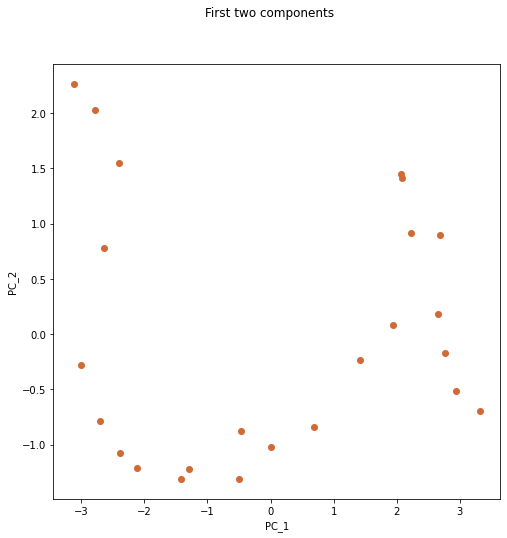

In [9]:
df_projected=pca.transform(df_normal)
print(df_projected.shape)
plt.figure(figsize=(8,8))
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(df_projected[:,0], df_projected[:,1], c = "#D06B36", s = 50, linewidth=0)
#need to normalise range normalise, scale with min and max or wrt to std with z scores for more robust

Theres seems to be no clear relationship between principle components

In [10]:
column_names=np.asarray(df.columns.values)
#show top 10 loadings of PC 1  
pc_1_loadings = np.asarray(pca.components_[0])[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]
pc_1_names = np.asarray(column_names)[np.argsort( np.abs(pca.components_[0]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

Column " International Passenger Revenue ($) " has a loading of:  -0.1619996846457616
Column " Transport Related Expenses ($) " has a loading of:  -0.1610694822438621
Column " ASM Prodcued per Employee Equivalent " has a loading of:  -0.15931076340220274
Column " Internation ASM as % of total ASM " has a loading of:  -0.1528612579986522
Column " Domestic ASM as % of total ASM " has a loading of:  0.1528612579986517
Column " Total Load Factor (%) " has a loading of:  -0.14547329170515613
Column " Domestic Load Factor (%) " has a loading of:  -0.14538520108090455
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.14083759220620737
Column " International Revenue as % of total Revenue " has a loading of:  -0.1408375922062073
Column " International Revenue ($) per ASM " has a loading of:  -0.14078719723634342


In [11]:
#show top 10 loadings of PC 2  
pc_2_loadings = np.asarray(pca.components_[1])[np.argsort( np.abs(pca.components_[1]))[::-1]][0:10]
pc_2_names = np.asarray(column_names)[np.argsort( np.abs(pca.components_[1]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

Column " Flight Attendant Employee Equivalents " has a loading of:  0.2520880825015597
Column "  Total Labour Operating Expenses per ASM($) " has a loading of:  0.22446131190094795
Column " ASM Prodcued per Dollar Employee Compensation " has a loading of:  -0.2222828050759804
Column " Pilot and Co-Pilot equivalents " has a loading of:  0.21104618719184484
Column " Total Departed Seats " has a loading of:  0.2078286141067168
Column " ASM Prodcued per Dollar Pilot Compensation " has a loading of:  -0.20596695847007973
Column " Full Time Employees Equivalents " has a loading of:  0.1880483991964054
Column " Management and Other Expenses per ASM " has a loading of:  0.18564543834673455
Column " Management and Other Expenses ($) " has a loading of:  0.18420909932477986
Column " CASM excluding Transport and Fuel ($ per ASM) " has a loading of:  0.18083931253479005


### Further PCA

We can attempt try to do a more local PCA analysis to see if the components can be better interpreted :

#### Local Analysis:

In [12]:
#select first component 
columns_selected = np.argsort( np.abs(pca.components_[0]))[::-1][0:10]
column_names_selected = column_names[columns_selected]
df_selected = df_normal[:][columns_selected]
df_selected=pd.DataFrame(df_selected)
df_selected.columns=column_names_selected

In [13]:
# Build a model that will return two principal components
pca_selected = PCA(n_components=2)

# We first fit a PCA model to the data
pca_selected.fit(df_selected)

PCA(n_components=2)

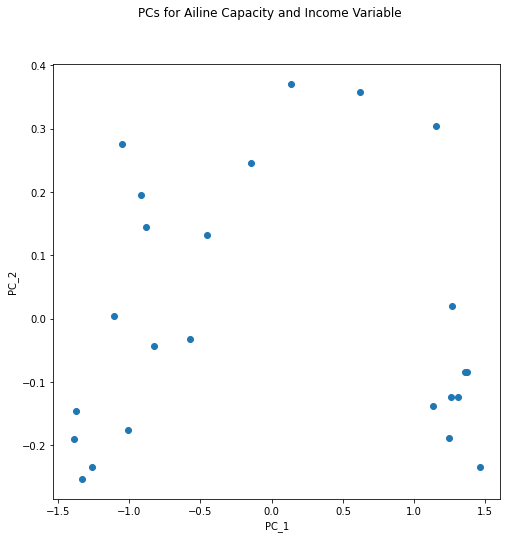

In [14]:
projected_df_selected = pca_selected.transform(df_selected)

plt.figure(figsize=(8,8))
plt.suptitle('PCs for Ailine Capacity and Income Variable')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projected_df_selected[:,0], projected_df_selected[:,1])

In [15]:
print ("--- Firstly, the first component: ")
pc_1_loadings = np.asarray(pca_selected.components_[0])[np.argsort( np.abs(pca_selected.components_[0]))[::-1]][0:10]
pc_1_names = np.asarray(column_names_selected)[np.argsort( np.abs(pca_selected.components_[0]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_1_names[i] , "\" has a loading of: ", pc_1_loadings[i])

--- Firstly, the first component: 
Column " Transport Related Expenses ($) " has a loading of:  -0.34056204431613407
Column " ASM Prodcued per Employee Equivalent " has a loading of:  -0.33002181844219297
Column " International Passenger Revenue ($) " has a loading of:  -0.32820125505025655
Column " Internation ASM as % of total ASM " has a loading of:  -0.3229429801183477
Column " Domestic ASM as % of total ASM " has a loading of:  0.32294298011834666
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.3097060394400071
Column " International Revenue as % of total Revenue " has a loading of:  -0.3097060394400065
Column " Total Load Factor (%) " has a loading of:  -0.3001098192828339
Column " Domestic Load Factor (%) " has a loading of:  -0.298751984653054
Column " International Revenue ($) per ASM " has a loading of:  -0.29605468919775346


In [16]:
print ("--- Secondly, the second component: ")
pc_2_loadings = np.asarray(pca_selected.components_[1])[np.argsort( np.abs(pca_selected.components_[1]))[::-1]][0:10]
pc_2_names = np.asarray(column_names_selected)[np.argsort( np.abs(pca_selected.components_[1]))[::-1]][0:10]

for i in range(0, 10):
    print ( "Column \"" , pc_2_names[i] , "\" has a loading of: ", pc_2_loadings[i])

--- Secondly, the second component: 
Column " Transport Related Expenses ($) " has a loading of:  0.43055153250407885
Column " ASM Prodcued per Employee Equivalent " has a loading of:  0.4293704251248166
Column " Domestic ASM as % of total ASM " has a loading of:  0.38162215680749184
Column " Internation ASM as % of total ASM " has a loading of:  -0.38162215680748973
Column " Total Load Factor (%) " has a loading of:  0.32690732267250533
Column " Domestic Load Factor (%) " has a loading of:  0.2853211923460167
Column " International Revenue ($) per ASM " has a loading of:  -0.2296358874360992
Column " International Revenue as % of total Revenue " has a loading of:  -0.2152947509838229
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.21529475098382272
Column " International Passenger Revenue ($) " has a loading of:  -0.07268145522845564


Both components from a locally selected dataset return similar results. We have not been able to derive any further detail or structure from this further analysis. 

# Correlations accross all features with Revenue and Profits

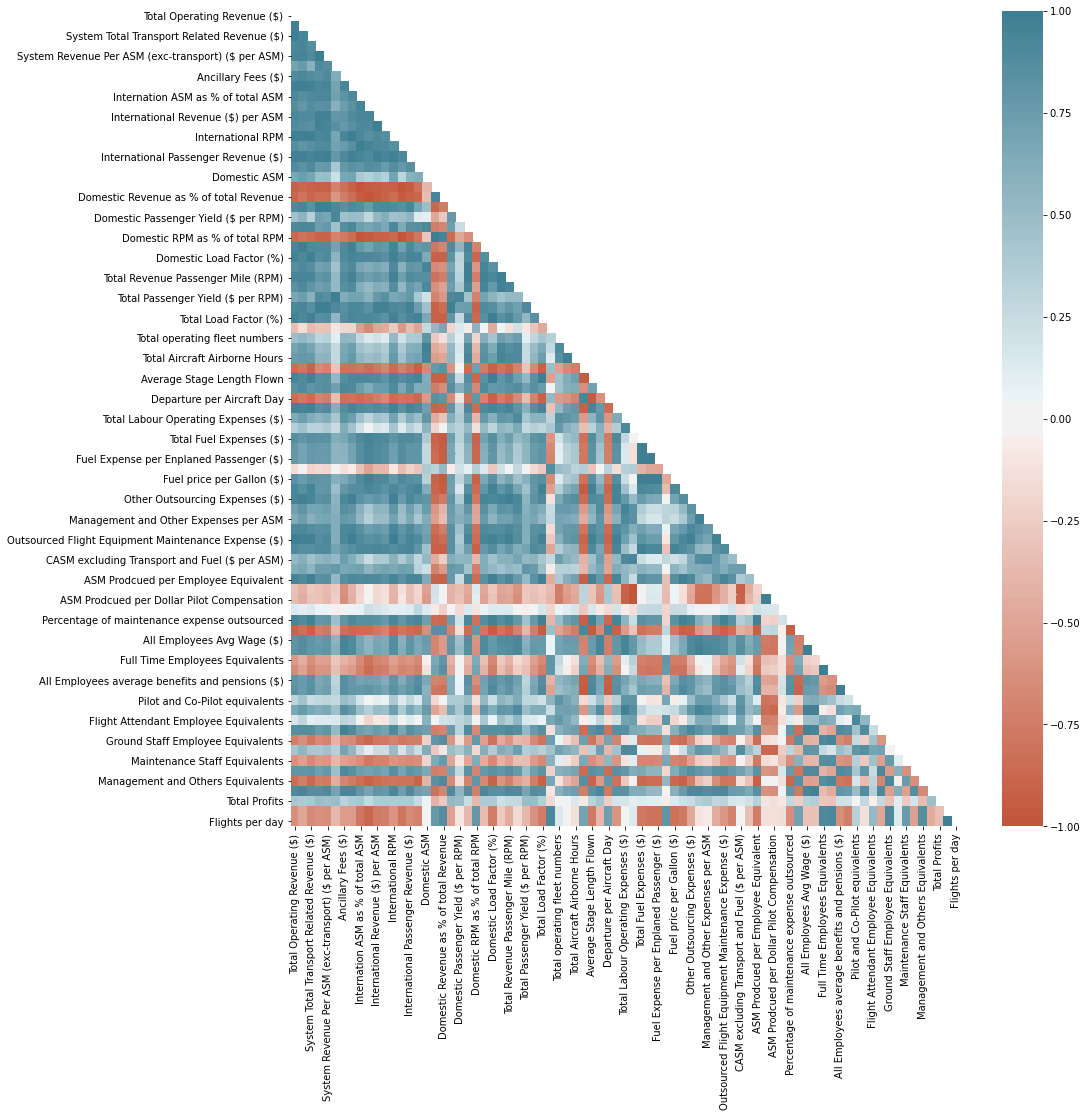

In [17]:
corr = df.corr()
#print(corr.head())

plt.figure(figsize = (15,15))
import seaborn as sns

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200))

Text(0.5, 1.0, 'Profits Correlation Bar')

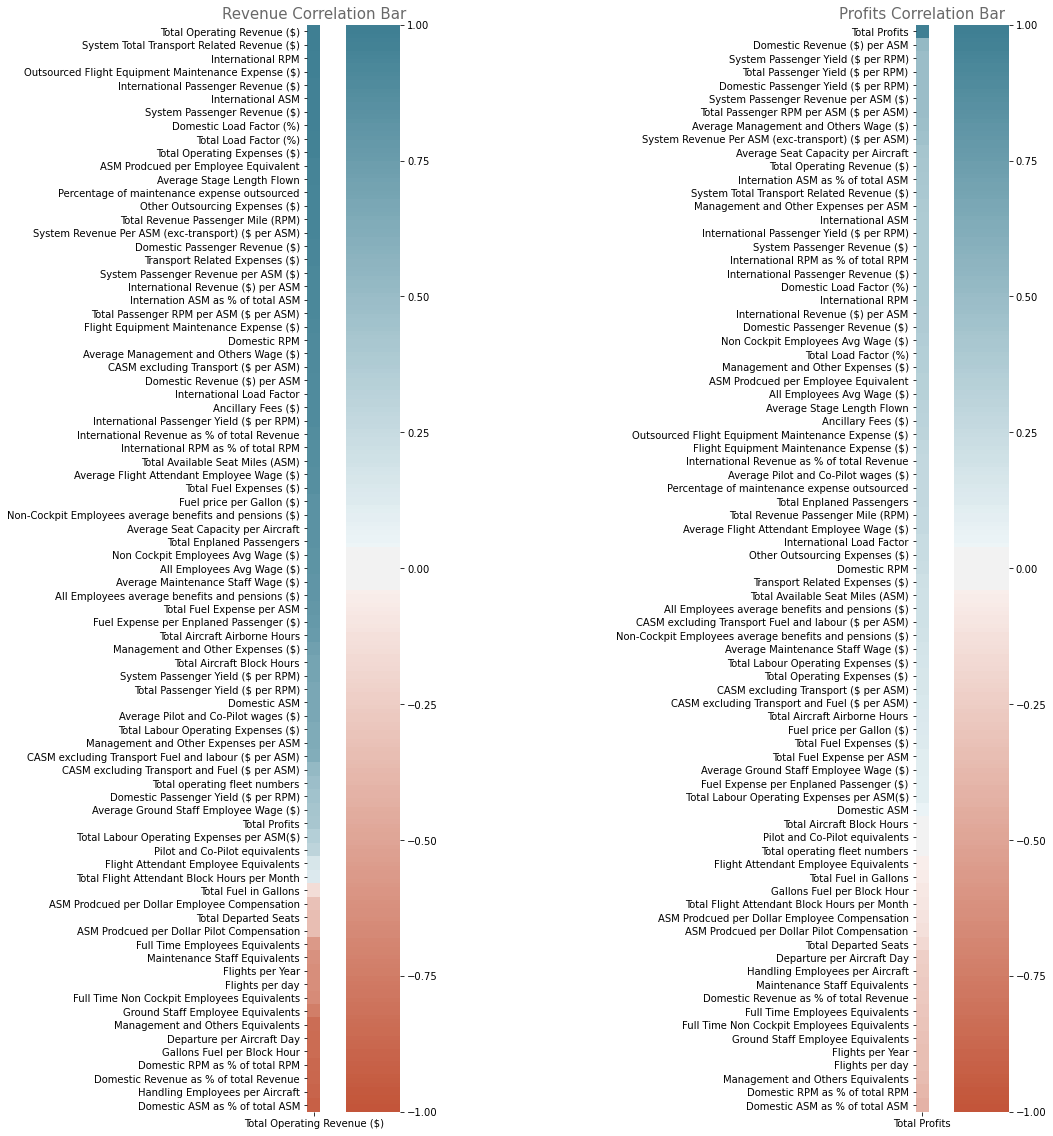

In [18]:
corr = df.corr()

#sort by the amount of correlation
revenue_corr = corr[["Total Operating Revenue ($)"]]
revenue_corr=revenue_corr.sort_values(by =["Total Operating Revenue ($)"],ascending=False)

profit_corr = corr[["Total Profits"]]
profit_corr=profit_corr.sort_values(by =["Total Profits"],ascending=False)

plt.figure(figsize = (20,20))

ax=plt.subplot(121)

import seaborn as sns
ax = sns.heatmap(
    revenue_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_title("Revenue Correlation Bar", fontsize=15, color='dimgrey')

ax1=plt.subplot(122)

ax1 = sns.heatmap(
    profit_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax1.set_title("Profits Correlation Bar", fontsize=15, color='dimgrey')

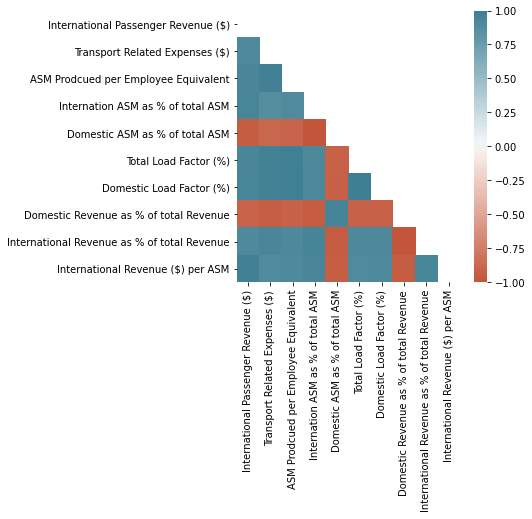

In [19]:
corr = df[column_names_selected].corr()
#print(corr.head())

plt.figure(figsize = (5,5))
import seaborn as sns

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

In [20]:
#Summary statistics of top PCA loading feautres
df[column_names_selected].describe()

,International Passenger Revenue ($),Transport Related Expenses ($),ASM Prodcued per Employee Equivalent,Internation ASM as % of total ASM,Domestic ASM as % of total ASM,Total Load Factor (%),Domestic Load Factor (%),Domestic Revenue as % of total Revenue,International Revenue as % of total Revenue,International Revenue ($) per ASM
count,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.604308e+10,1.284802e+10,2.361433,29.247544,70.752456,77.872490,77.812068,72.547119,27.452881,0.094755
std,8.587549e+09,7.948852e+09,0.357964,3.213268,3.213268,5.720457,6.714902,4.207309,4.207309,0.016775
min,1.583341e+10,1.388642e+09,1.876632,24.999670,66.383074,67.484937,65.913394,66.455085,21.754068,0.072889
25%,1.729038e+10,3.555991e+09,1.949455,26.153687,67.909293,72.018898,70.682892,69.195253,23.091186,0.080181
50%,2.502071e+10,1.702520e+10,2.515051,29.146951,70.853049,80.051908,80.124252,71.614644,28.385356,0.092040
75%,3.463072e+10,1.943034e+10,2.640736,32.090707,73.846313,83.321806,84.044001,76.908814,30.804747,0.108410
max,3.851251e+10,2.149814e+10,2.815807,33.616926,75.000330,84.086431,85.541313,78.245932,33.544915,0.121573


### Pair Plot of selected features

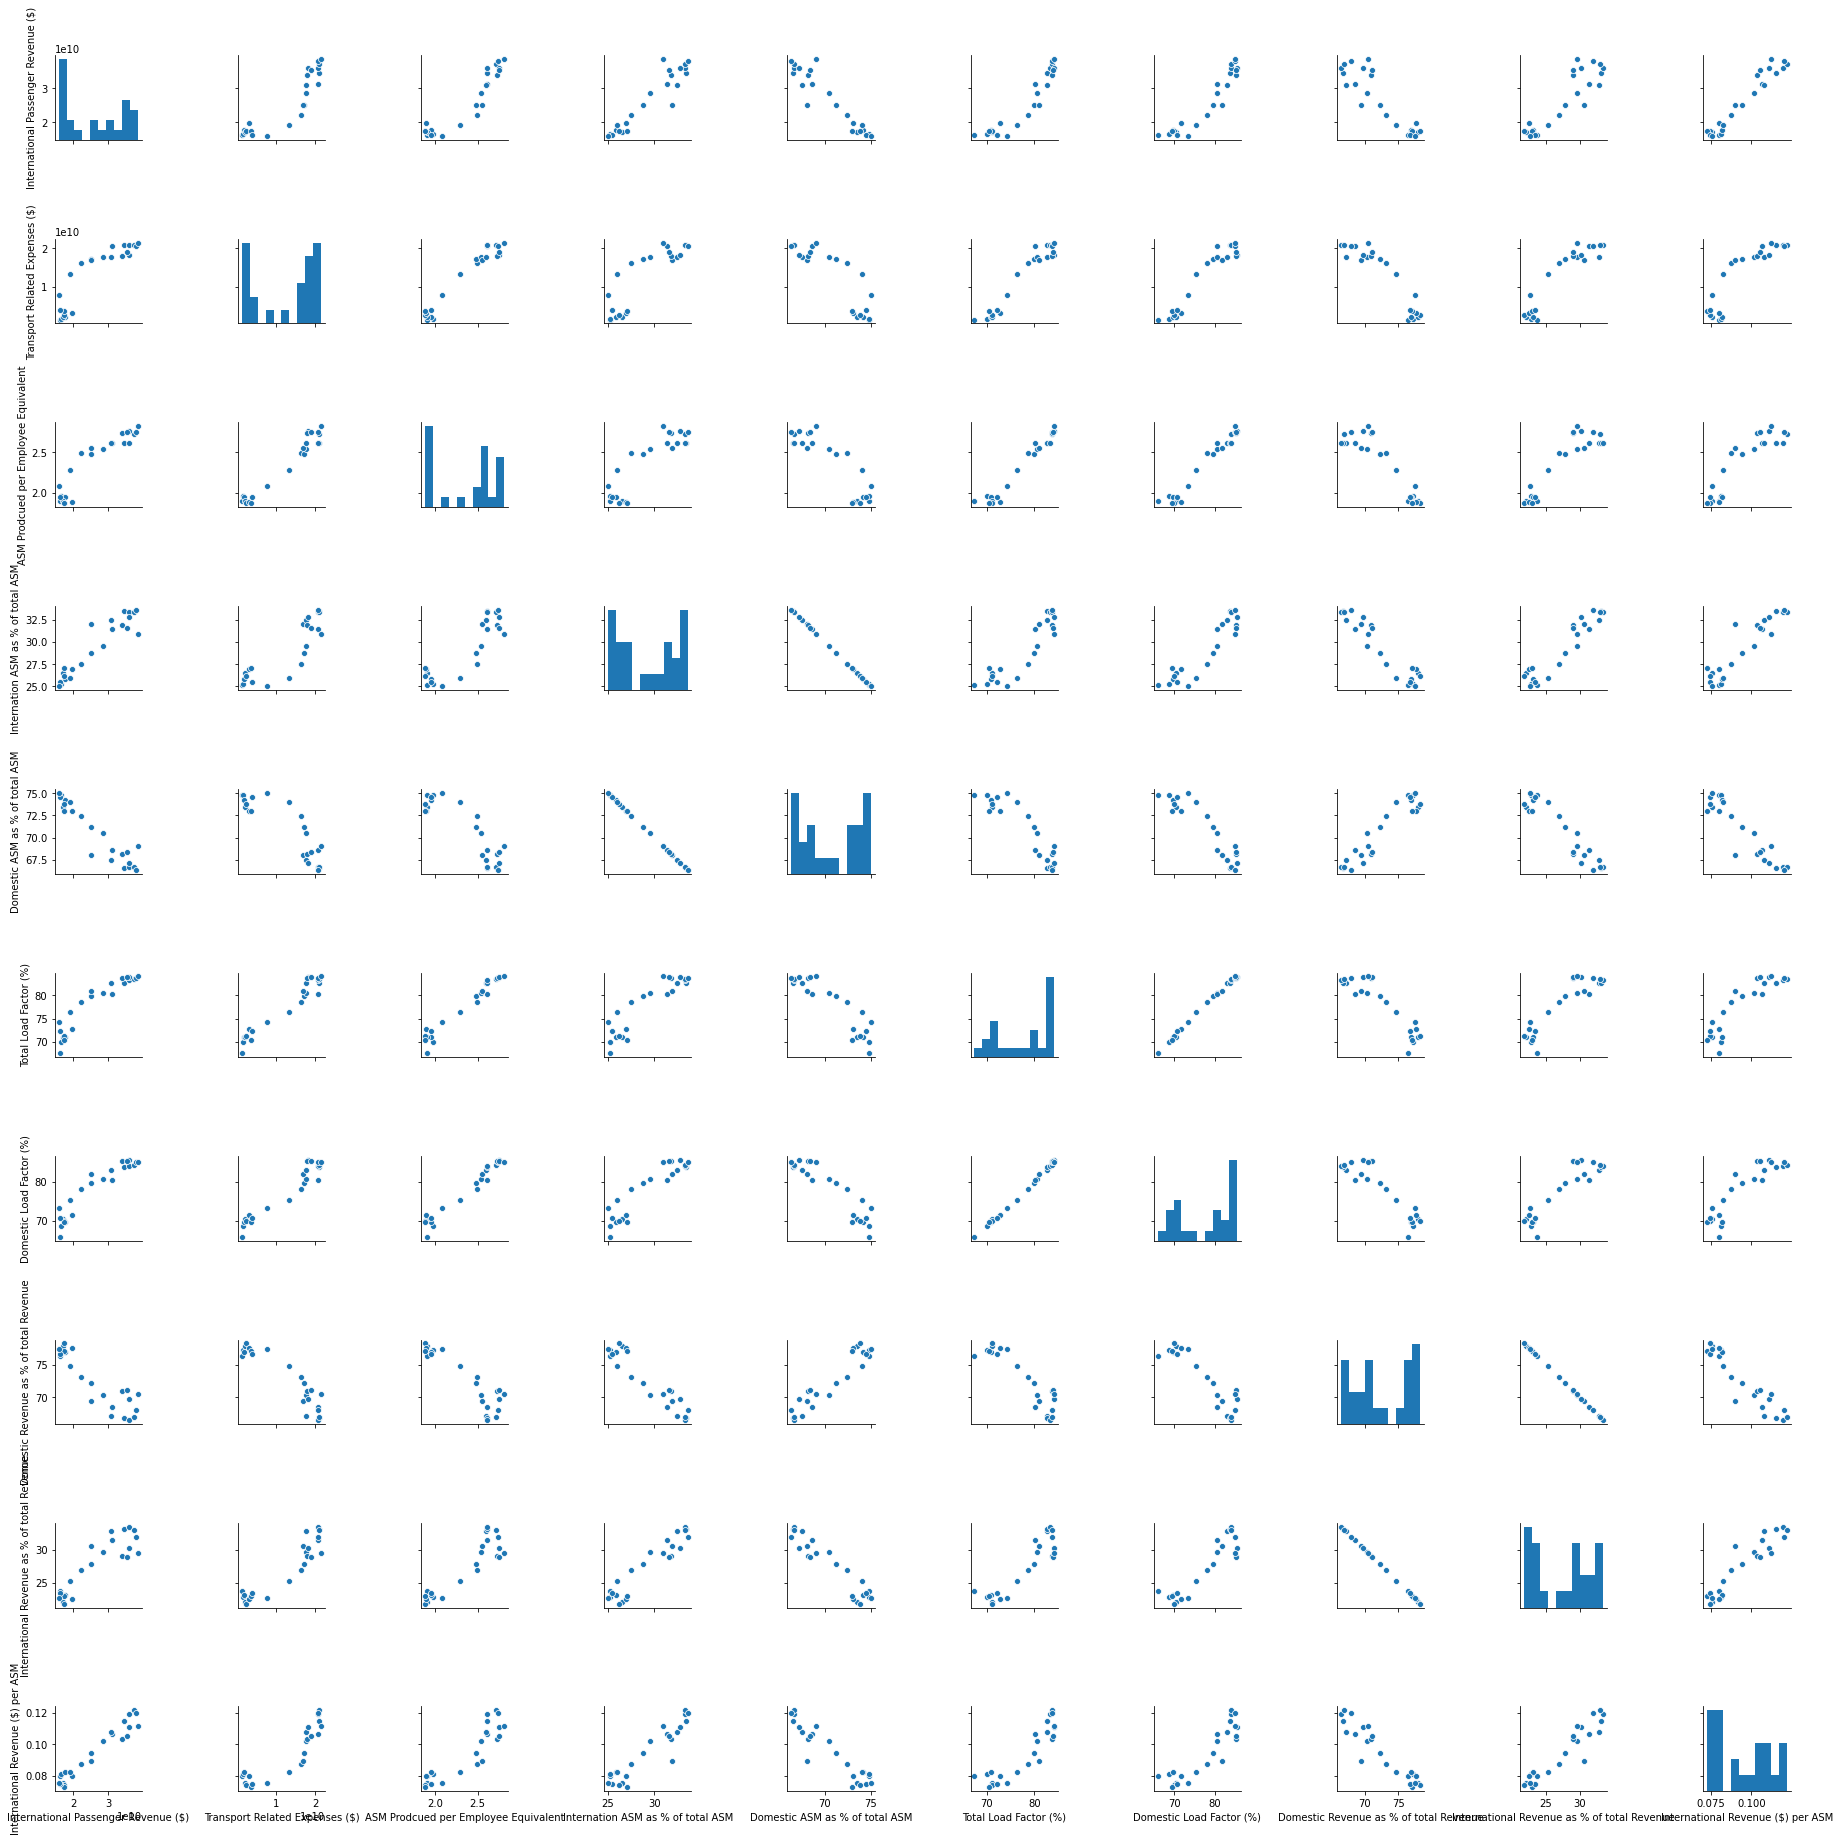

In [21]:
sns.pairplot(df[column_names_selected])

The selected features are dominated by a mix of strong positive or negative correlations between them as demonstrated by the correlation heat map prior.

# Feature Importance

# EDA

# Revenue, Expenses and Profit
Looking at trends in Revenue, Expenses and Profits across the industry, and in it's subsets.

Text(0.5, 1.0, 'Total Industry Profits - 1995 to 2018 ')

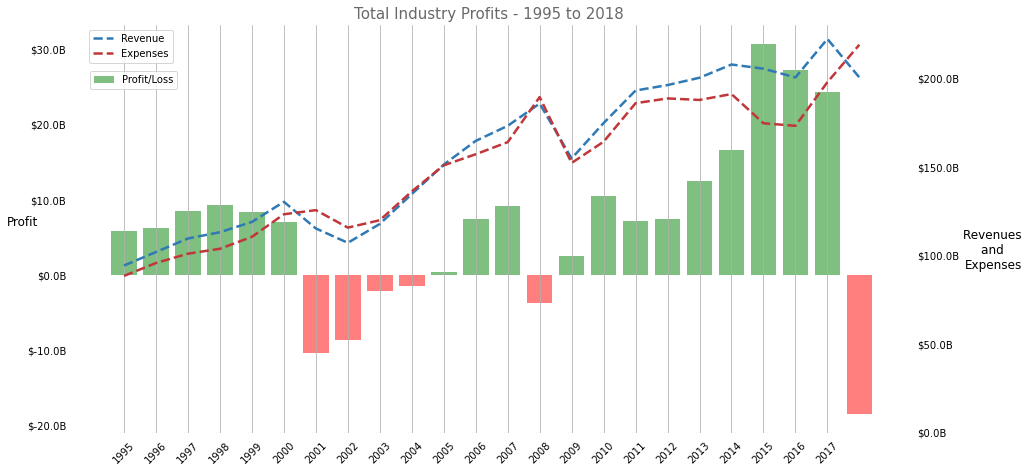

In [22]:
color = sns.color_palette("RdBu")
#sns.palplot(color)

#tick formatter 
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

plt.figure(figsize=(15, 7.5)) 
ax1 = plt.subplot(111)  

Year=np.arange(1995,2019,1)

#turn off axis spines
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 

#share x axis
ax2 = ax1.twinx()

#turn off axis spines
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)

#x axis tick parameters
ax1.xaxis.set_tick_params(labelsize=10, rotation=45)
ax1.xaxis.set_ticks(np.arange(1995, 2018, 1))

ax1.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax2.tick_params(right=False) 

ax1.set_ylabel("Profit", fontsize=12, rotation=0)

ax2.set_ylabel("Revenues \nand \nExpenses",fontsize=12,rotation=0)
ax2.yaxis.set_label_coords(1.1,0.5)

#plot data on axis
ax1.bar(Year, df["Total Profits"], label= "Profit/Loss", alpha=0.5, color=(df["Total Profits"] > 0).map({True: 'g', False: 'r'}))

ax2.plot(df["Total Operating Revenue ($)"], label ="Revenue",color =color[-1],ls="--", lw=2.5)
ax2.plot((df["Total Operating Expenses ($)"]), label ="Expenses",color =color[0],ls="--", lw=2.5)

#format y ticks to billions
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim(0,230e9 )

#add legend
ax1.legend(bbox_to_anchor=(0.13, 0.9))
ax2.legend(bbox_to_anchor=(0.125, 1))
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

#font parameters
title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 15,}#title font
plt.title("Total Industry Profits - 1995 to 2018 ", loc='center',fontdict=title_font, fontsize=15)

Network carrier produce 4.029328467690855 % profit
Low cost carrier produce 10.07850169228896 % profit
Other airlines produce 10.897316249359356 % profit
[9.12855287e+10 3.87855471e+10 1.58015728e+10]
ratio of Network profit vs LCC  2.3535965210092393


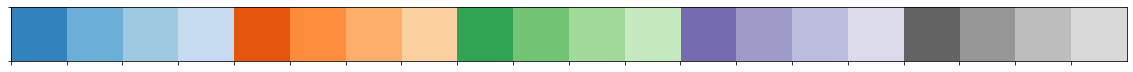

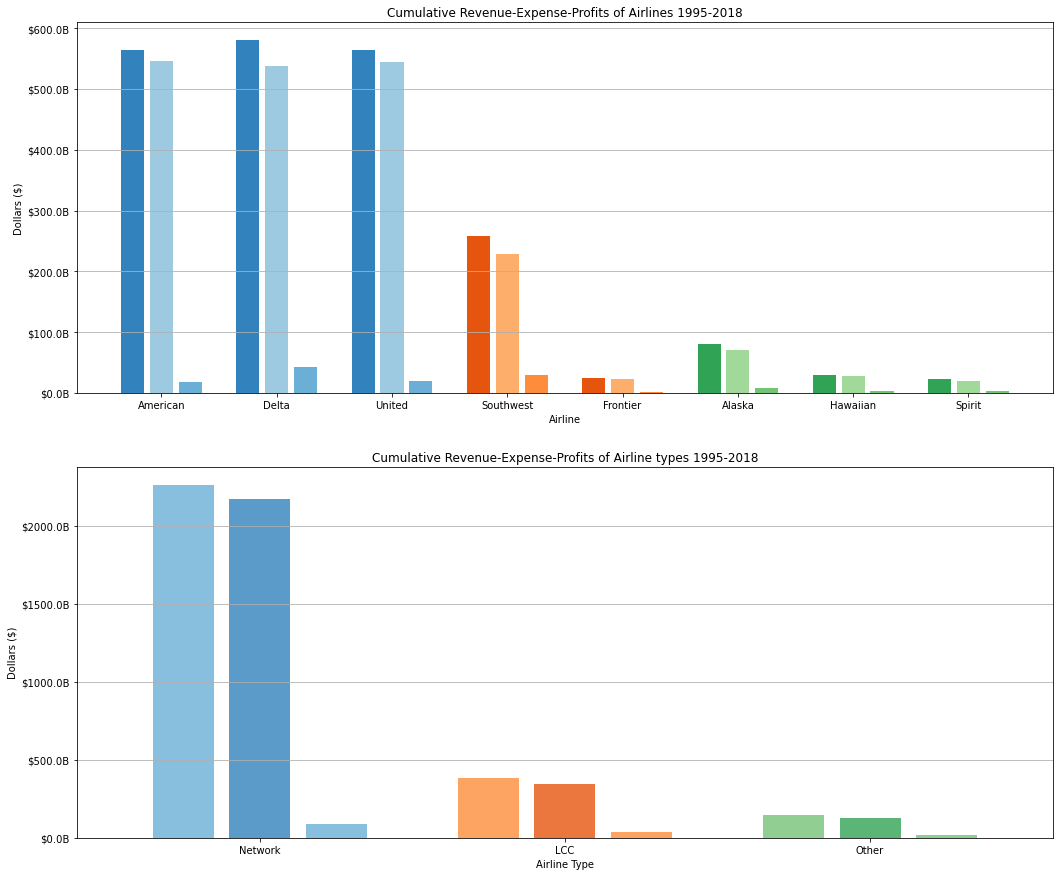

In [23]:
color = sns.color_palette("tab20c")
sns.palplot(color)

barwidth1=0.2
barwidth2=0.2

plt.figure(figsize=(17.5,15))

ax1=plt.subplot(211)

clrs1=[color[0],color[0],color[0],color[4],color[4],color[8],color[8],color[8]]
clrs2=[color[1],color[5],color[9]]

clrs3=[color[2],color[2],color[2],color[6],color[6],color[10],color[10],color[10]]
clrs4=[color[0],color[4],color[8]]

clrs5=[color[1],color[1],color[1],color[5],color[5],color[9],color[9],color[9]]
clrs6=[color[1],color[5],color[9]]

rev_x1=(np.arange(1,9))-0.25
exp_x1=(np.arange(1,9))
rev_x2=np.arange(1,4)-0.25
exp_x2=np.arange(1,4)

prof_x1=(np.arange(1,9))+0.25
prof_x2=np.arange(1,4)+0.25

ax1.bar(rev_x1, airlines_rev, color=clrs1,width=barwidth1)
ax1.bar(exp_x1, airlines_exp, color=clrs3, width=barwidth1)
ax1.bar(prof_x1, airlines_prof, color=clrs5, width=barwidth1)
ax1.yaxis.set_major_formatter(formatter)
ax1.set_ylabel("Dollars ($)")
ax1.set_xlabel("Airline")
ax1.set_xticklabels(Labels1)
ax1.set_title("Cumulative Revenue-Expense-Profits of Airlines 1995-2018")
ax1.grid(axis='y')

ax2=plt.subplot(212)

ax2.bar(rev_x2,airline_types_rev, color=clrs2,alpha=0.8,width=barwidth2)
ax2.bar(exp_x2,airline_types_exp, color=clrs4,alpha=0.8,width=barwidth2)
ax2.bar(prof_x2,airline_types_prof, color=clrs6,alpha=0.8,width=barwidth2)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Dollars ($)")
ax2.set_xlabel("Airline Type")
ax2.set_xticks((np.arange(4)))
ax2.set_xticklabels(Labels4)
ax2.set_xlim(0.4,3.6)
ax2.set_title("Cumulative Revenue-Expense-Profits of Airline types 1995-2018")
ax2.grid(axis='y')

print("Network carrier produce",(airline_types_prof/airline_types_rev)[0]*100, "% profit")
print("Low cost carrier produce",(airline_types_prof/airline_types_rev)[1]*100, "% profit")
print("Other airlines produce",(airline_types_prof/airline_types_rev)[2]*100, "% profit")


print(airline_types_prof)
print("ratio of Network profit vs LCC ",(airline_types_prof[0]/airline_types_prof[1]))

Text(0.5, 1.0, 'Airline Expense')

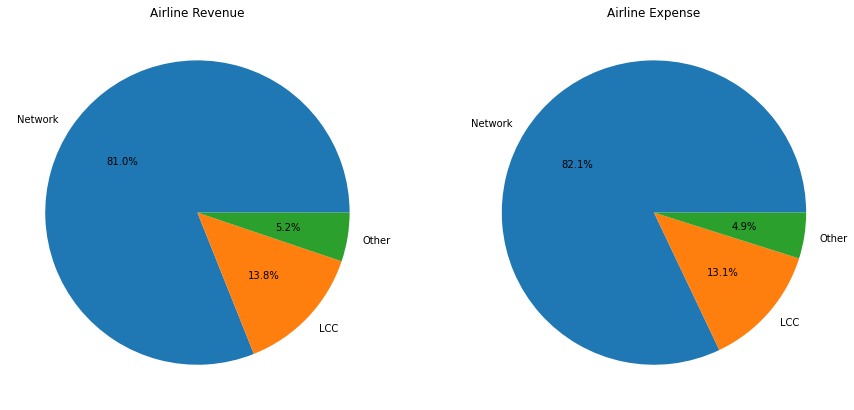

In [24]:
plt.figure(figsize=(15,15))
Labels=["Network","LCC","Other"]
ax1=plt.subplot(121)
ax1.pie(airline_types_rev, labels=Labels, autopct='%1.1f%%')
ax1.set_title("Airline Revenue")

ax2=plt.subplot(122)
ax2.pie(airline_types_exp, labels=Labels, autopct='%1.1f%%')
ax2.set_title("Airline Expense")

## Domestic vs International 

### differences and importance

In [25]:
df['International ASM']

Year
1995    2.101305e+11
1996    2.141017e+11
1997    2.225720e+11
1998    2.297577e+11
1999    2.357971e+11
2000    2.469238e+11
2001    2.389054e+11
2002    2.191512e+11
2003    2.118331e+11
2004    2.348554e+11
2005    2.553555e+11
2006    2.686901e+11
2007    2.836178e+11
2008    2.938901e+11
2009    2.803664e+11
2010    2.897003e+11
2011    3.031454e+11
2012    3.038437e+11
2013    3.092499e+11
2014    3.197523e+11
2015    3.265487e+11
2016    3.305125e+11
2017    3.386513e+11
2018    3.463945e+11
Name: International ASM, dtype: float64

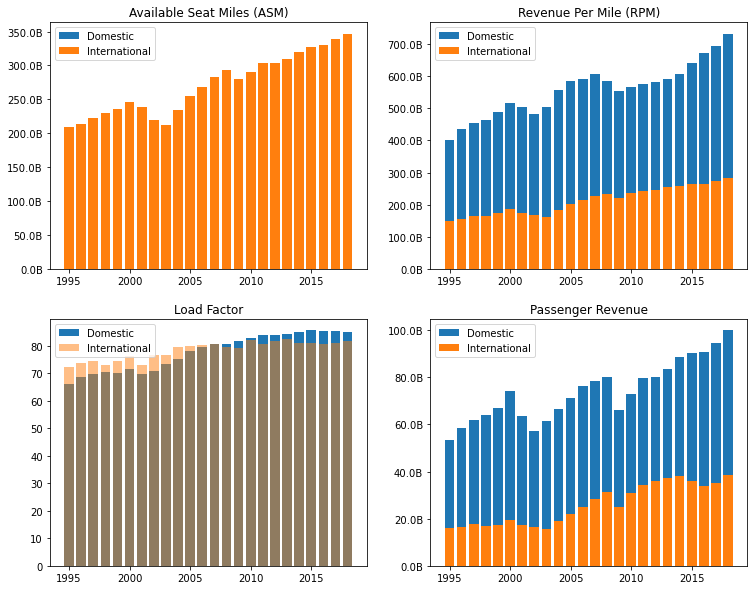

Avg Domestic ASM % of total:  70.75245609283677
Avg International ASM % of total:  29.24754390716321

Avg Domestic RPM % of total:  70.59322665257363
Avg International RPM % of total:  29.406773347426366

Avg Domestic Load factor 77.81206809170706
Avg International Load Factor 78.38270953327637

Avg Domestic Revenue % of total:  72.5471189801621
Avg International Revenue % of total:  27.452881019837907



In [26]:
#tick formatter 
def billions(x, pos):
    return '%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

plt.figure(figsize=(12.5,10))
ax1=plt.subplot(221)

p1=plt.bar(Year, df["Domestic ASM"], label="Domestic")
p2=plt.bar(Year, df["International ASM"], label="International")
ax1.yaxis.set_major_formatter(formatter)
plt.title("Available Seat Miles (ASM)")
plt.legend()

ax2=plt.subplot(222)

p3=plt.bar(Year, df["Domestic RPM"],label="Domestic")
p4=plt.bar(Year, df["International RPM"],label="International")
ax2.yaxis.set_major_formatter(formatter)
plt.title("Revenue Per Mile (RPM)")
plt.legend()

ax3=plt.subplot(223)

p5=plt.bar(Year, df["Domestic Load Factor (%)"],label="Domestic")
p6=plt.bar(Year, df["International Load Factor"],label="International", alpha=0.5)
plt.title("Load Factor")
plt.legend()

ax4=plt.subplot(224)

p7=plt.bar(Year, df["Domestic Passenger Revenue ($)"],label="Domestic")
p8=plt.bar(Year, df["International Passenger Revenue ($)"],label="International")
ax4.yaxis.set_major_formatter(formatter)
plt.title("Passenger Revenue")
plt.legend()           
plt.show()
           
print("Avg Domestic ASM % of total: ",np.mean(df["Domestic ASM as % of total ASM"]))
print("Avg International ASM % of total: ", np.mean(df["Internation ASM as % of total ASM"]))
print("")

print("Avg Domestic RPM % of total: ",np.mean(df["Domestic RPM as % of total RPM"]))
print("Avg International RPM % of total: ", np.mean(df["International RPM as % of total RPM"]))
print("")

print("Avg Domestic Load factor", np.mean(df["Domestic Load Factor (%)"]))
print("Avg International Load Factor", np.mean(df["International Load Factor"]))
print("")           

print("Avg Domestic Revenue % of total: ", np.mean(df["Domestic Revenue as % of total Revenue"]))
print("Avg International Revenue % of total: ", np.mean(df["International Revenue as % of total Revenue"]))
print("")

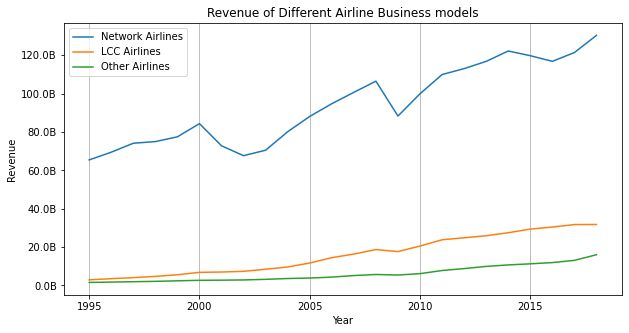

In [27]:
#airline types
network_rev=airline_rev[" --sub Network"]
LCC_rev=airline_rev[" -- sub LCC"]
Other_rev=airline_rev[" -- sub Other"]

airline_types_rev=[network_rev, LCC_rev, Other_rev]
Labels2=["Network Airlines","LCC Airlines","Other Airlines"]

plt.figure(figsize=(10,5))
ax1=plt.subplot(111)
ax1.plot(network_rev,label=Labels2[0])
ax1.plot(LCC_rev,label=Labels2[1])
ax1.plot(Other_rev,label=Labels2[2])
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue")
ax1.grid(axis='x')
ax1.set_title("Revenue of Different Airline Business models")
ax1.yaxis.set_major_formatter(formatter)
plt.legend()

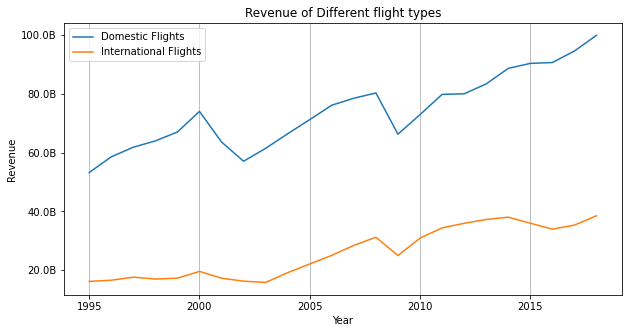

In [28]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(111)
ax1.plot(df["Domestic Passenger Revenue ($)"], label="Domestic Flights")
ax1.plot(df["International Passenger Revenue ($)"], label="International Flights")
ax1.grid(axis='x')
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue")
ax1.set_title("Revenue of Different flight types")
ax1.yaxis.set_major_formatter(formatter)
plt.legend()

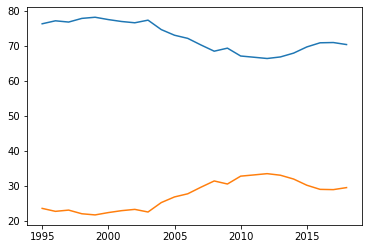

In [29]:
plt.plot(df["Domestic Revenue as % of total Revenue"])
plt.plot(df["International Revenue as % of total Revenue"])

# Flight Traffic

### Flights and Passengers

ASM describes the capacity to generate revenue so it would make sense to look into to traffic metrics as this is what gives rise to the available capacity. 
We will look into number of flights, number of total passengers against revenue as well as ASM and RPM:

Correlaion of number of passengers with revenue 0.8298954402831333


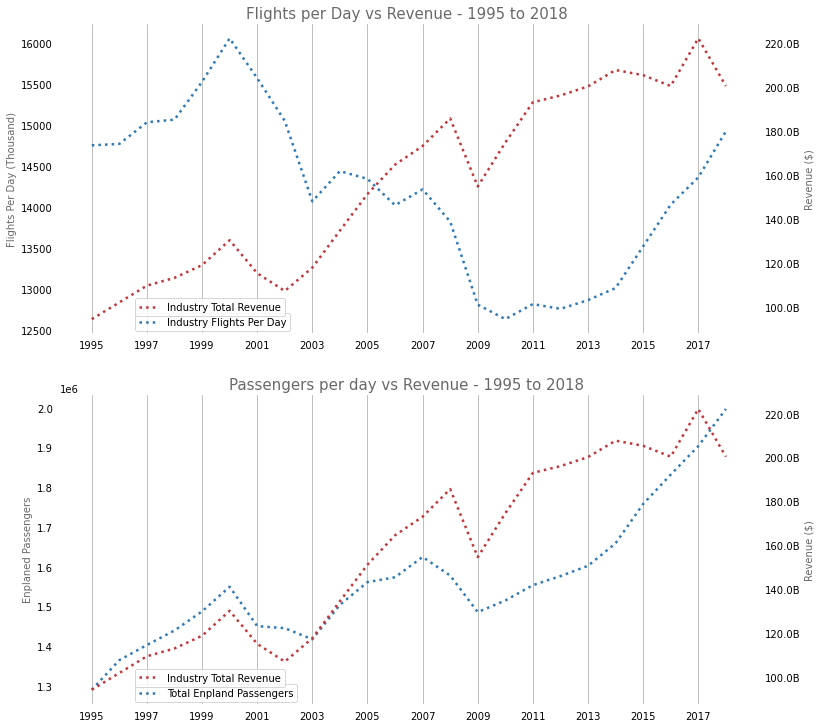

In [30]:
plt.figure(figsize=(12.5, 12.5)) 
color = sns.color_palette("RdBu")
ax1 = plt.subplot(211)  

ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False) 

ax2 = ax1.twinx()

ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False)

ax1.xaxis.set_tick_params(labelsize=10)
ax1.xaxis.set_ticks(np.arange(1995, 2018, 2))


ax1.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax2.tick_params(right=False) 

ax1.set_ylabel("Flights Per Day (Thousand)",color="dimgrey")
ax2.set_ylabel("Revenue ($)",color="dimgrey")

ax1.plot(df["Flights per day"],ls=":",lw=2.5,color=color[-1],label="Industry Flights Per Day")
ax2.plot(total_revenue,color =color[0],ls=":", lw=2.5, label="Industry Total Revenue")

ax1.legend(bbox_to_anchor=(0.1, 0.08), loc=2,)
ax2.legend(bbox_to_anchor=(0.1, 0.13), loc=2,)
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

#format y ticks to billions for axis 2

ax2.yaxis.set_major_formatter(formatter)

title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 12,}#title font
plt.title("Flights per Day vs Revenue - 1995 to 2018 ", loc='center',fontdict=title_font, fontsize=15)

ax3 = plt.subplot(212)  

ax3.spines["top"].set_visible(False)    
ax3.spines["bottom"].set_visible(False)    
ax3.spines["right"].set_visible(False)    
ax3.spines["left"].set_visible(False) 

ax4 = ax3.twinx()

ax4.spines["top"].set_visible(False)    
ax4.spines["bottom"].set_visible(False)    
ax4.spines["right"].set_visible(False)    
ax4.spines["left"].set_visible(False)

ax3.xaxis.set_tick_params(labelsize=10)
ax3.xaxis.set_ticks(np.arange(1995, 2018, 2))


ax3.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)    
ax4.tick_params(right=False) 

ax3.set_ylabel("Enplaned Passengers",color="dimgrey")
ax4.set_ylabel("Revenue ($)",color="dimgrey")

ax3.plot((total_traffic["Total Enplaned Passengers"]/365),ls=":",lw=2.5,color=color[-1],label="Total Enpland Passengers")
ax4.plot(total_revenue,color =color[0],ls=":", lw=2.5, label="Industry Total Revenue")

ax3.legend(bbox_to_anchor=(0.1, 0.08), loc=2,)
ax4.legend(bbox_to_anchor=(0.1, 0.13), loc=2,)
ax3.grid(False)
ax4.grid(False)
ax3.xaxis.grid(which="major")

#format y ticks to billions for axis 2

ax4.yaxis.set_major_formatter(formatter)

title_font = {'family': 'sans-serif','color':  'dimgrey','weight': 'normal','size': 12,}#title font
plt.title("Passengers per day vs Revenue - 1995 to 2018 ", loc='center',fontdict=title_font, fontsize=15)
import scipy as sp
print("Correlaion of number of passengers with revenue", sp.stats.pearsonr(df["Total Enplaned Passengers"],df["Total Operating Revenue ($)"] )[0])

Very strong correlation between number of enplaned passengers with revenue. The divergence or convergence between the two variables can indicate a rise or drop in how much revenue per passenger is made. External events will have a big influence on how people travel and this shown with the way the dips coincide with said events. It is through the passengers through which external events can shock the operating revenues.

([<matplotlib.patches.Wedge at 0x7a61605afbd0>,
 [Text(-0.6323200328079948, 0.9000952039143951, 'Network'),
  Text(0.4351244750595214, -1.0102805012491214, 'LCC'),
  Text(1.0768059653755704, -0.22469738078488183, 'Other')],
 [Text(-0.344901836077088, 0.4909610203169427, '69.5%'),
  Text(0.2373406227597389, -0.5510620915904298, '24.0%'),
  Text(0.5873487083866746, -0.12256220770084462, '6.5%')])

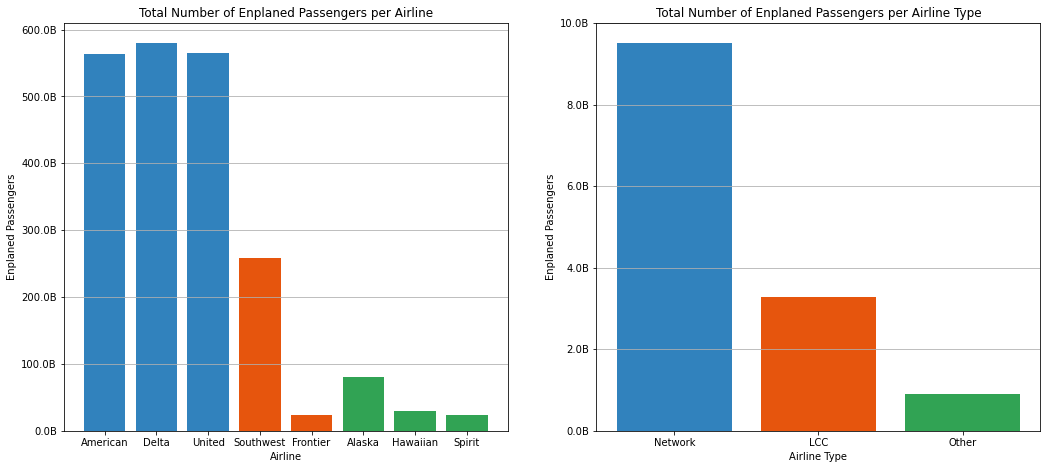

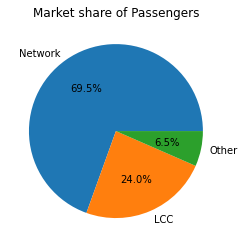

In [31]:
#tick formatter 
def billions(x, pos):
    return '%1.1fB' % (x*1e-9)
formatter = FuncFormatter(billions)

plt.figure(figsize=(17.5,7.5))
ax1=plt.subplot(121)
ax1.bar(pass_labels,airlines_pass, color=clrs1)
ax1.set_title("Total Number of Enplaned Passengers per Airline")
ax1.set_ylabel("Enplaned Passengers")
ax1.set_xlabel("Airline")
ax1.yaxis.set_major_formatter(formatter)
ax1.grid(axis='y')

ax2=plt.subplot(122)
ax2.bar(pass_type_labels,airline_types_pass,color=clrs4)
ax2.set_title("Total Number of Enplaned Passengers per Airline Type")
ax2.set_ylabel("Enplaned Passengers")
ax2.set_xlabel("Airline Type")
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(axis='y')

plt.figure()
ax3=plt.subplot(111)
ax3.set_title("Market share of Passengers")
ax3.pie(airline_types_pass,labels=Labels, autopct='%1.1f%%')

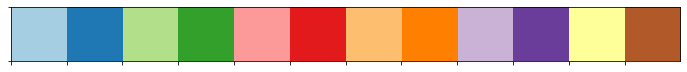

In [32]:
color = sns.color_palette("Paired")
sns.palplot(color)

ASM recovered from 2008 by  0.107715460585741
RPM recovered from 2008 by  0.10162467560507948

No. of Passengers recovered from 2008 by 16.454456986532094 %
No. of Passengers recovered from 2008 by 34.42891981723883 %


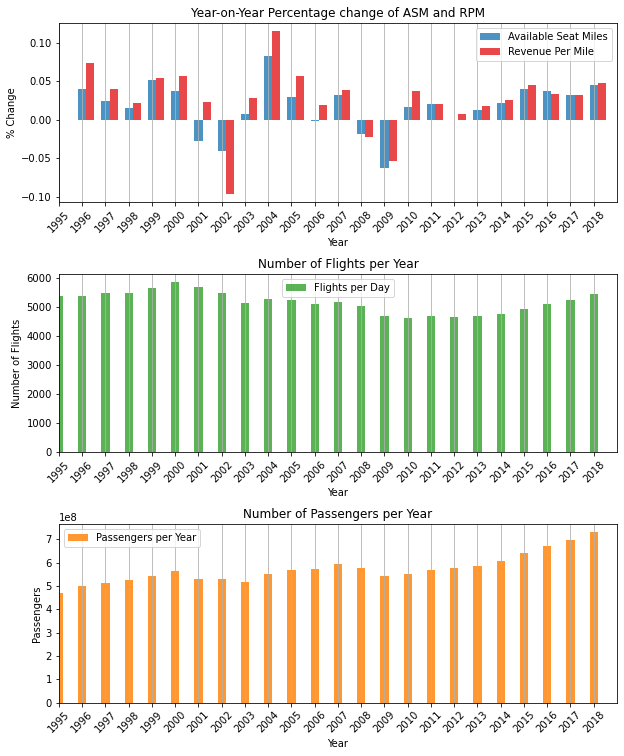

In [33]:
#Relative Change in ASM and RPM over the years is very small
#Calculate the percentage change and plot that instead of actual values
Year=np.arange(1995,2019,1)

#Percentage change ASM
df["% ASM Change"]=total_asm.pct_change()
df["% RPM Change"]=total_rpm.pct_change()

#fill first gap with 0
df["% RPM Change"]=df["% RPM Change"].fillna(0)
df["% ASM Change"]=df["% ASM Change"].fillna(0)

#define bar height variables
ASM=df["% ASM Change"].fillna(0)
RPM=df["% RPM Change"].fillna(0)

#set bar width
barwidth=0.35

#create figure
plt.figure(figsize=(10,12.5))
ax1=plt.subplot(311)
plt.subplots_adjust(hspace=0.4)

#x position of bars (asm at x and rpm at x + barwidth)
asm_x=Year
rpm_x=[x+barwidth for x in asm_x]

#plot bars
ax1.bar(asm_x,ASM,width=barwidth,color =color[1],alpha=0.8, label="Available Seat Miles" )
ax1.bar(rpm_x,RPM,width=barwidth, color=color[5],alpha=0.8, label="Revenue Per Mile")


#configure axis, ticks and legend
ax1.set_xlabel("Year")
ax1.set_ylabel("% Change")
ax1.set_title("Year-on-Year Percentage change of ASM and RPM")
#ax1.set_xticks(rotation=45)
ax1.set_xlim(1997,2019)
plt.xticks(rotation=45)
ax1.set_xticks(Year)
ax1.grid(axis='x')
ax1.legend()

ax2=plt.subplot(312)

flights=df["Flights per Year"]


flights_x=Year

plt.bar(flights_x, flights, width=barwidth,color=color[3], alpha=0.8, label="Flights per Day")

#configure axis, ticks and legend
plt.xlabel("Year")
plt.ylabel("Number of Flights")
plt.title("Number of Flights per Year")
plt.xticks(rotation=45)
plt.xlim(1995,2019)
ax2.xaxis.set_ticks(Year)
plt.grid(axis='x')
plt.legend()

ax3=plt.subplot(313)

passengers=(df["Total Enplaned Passengers"])

pass_x=Year

plt.bar(pass_x, passengers, width=barwidth,color=color[7], alpha=0.8, label="Passengers per Year")

#configure axis, ticks and legend
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("Number of Passengers per Year")
plt.xticks(rotation=45)
plt.xlim(1995,2019)
ax3.xaxis.set_ticks(Year)
plt.grid(axis='x')
plt.legend()

print("ASM recovered from 2008 by ", (ASM[2018]-ASM[2009]))
print("RPM recovered from 2008 by ", (RPM[2018]-RPM[2009]))
print("")
print("No. of Passengers recovered from 2008 by",((flights[2018]-flights[2009])/flights[2009])*100, "%")
print("No. of Passengers recovered from 2008 by",((passengers[2018]-passengers[2009])/passengers[2009])*100, "%")

- RPM lags behind ASM, however the % change in RPM is amplified in comparison to ASM.
- a larger ASM indicates larger capacity to generate revenue from more seats.
- In 2001 and 2002 ASM growth was reversed, possibly due to the events of 9/11. The growth in RPM dropped but was still positive in 2001 but shrunk drastically in the following year. This again shows the influence of external events on the US Commercial airline Industry.
- between 2003 to 2007 and 2010 to 2018 there is a positive trend in ASM and RPM however 2010 to 2018 has a lesser rate, possibly due to the longer lasting effects of the financial crisis. 
- flights and pasengers numbers generally follow the pattern as ASM and RPM but the increase in passengers in the latter years increased more sharply than number of flights. this would indicate are carrying more passengers on average but RPM and ASM did not increase as you might expect. This could mean a increase in a cost counteracted the expected effect.

Looking into the cost per available seat miles (CASM), as suggested by our PCA, will give us a clearer picture of whats going on.

### Cost per Available Seat Mile (CASM)

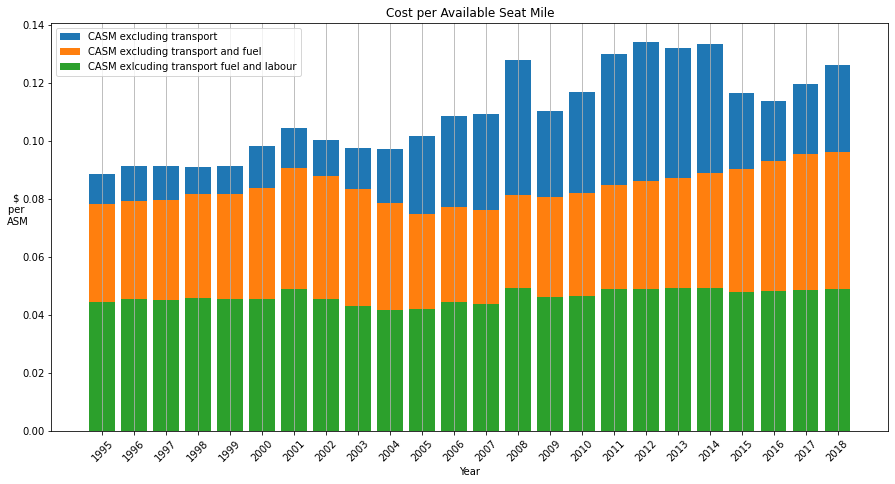

overall increase of CASM with labour,excluding transport and fuel is  0.01770683731309612
overall increase of CASM with labour and fuel excluding transport is  0.03761917555709278


In [34]:
plt.figure(figsize=(15,7.5))

casm1=df["CASM excluding Transport ($ per ASM)"]
casm2=df["CASM excluding Transport and Fuel ($ per ASM)"]
casm3=df["CASM excluding Transport Fuel and labour ($ per ASM)"]

p1=plt.bar(Year,casm1, label="CASM excluding transport")
p2=plt.bar(Year,casm2, label="CASM excluding transport and fuel")
p3=plt.bar(Year,casm3, label="CASM exlcuding transport fuel and labour")

plt.title("Cost per Available Seat Mile")
plt.ylabel("$ \nper \nASM", rotation=0)
plt.xlabel("Year")
plt.xticks(Year, rotation=45)
plt.grid(axis='x')
plt.legend(loc='upper left')

plt.show()
print("overall increase of CASM with labour,excluding transport and fuel is ",casm2[2018] - casm2[1995])
print("overall increase of CASM with labour and fuel excluding transport is ",casm1[2018] - casm1[1995])

# Expenses Breakdown

33331773000.0
21498142430.0


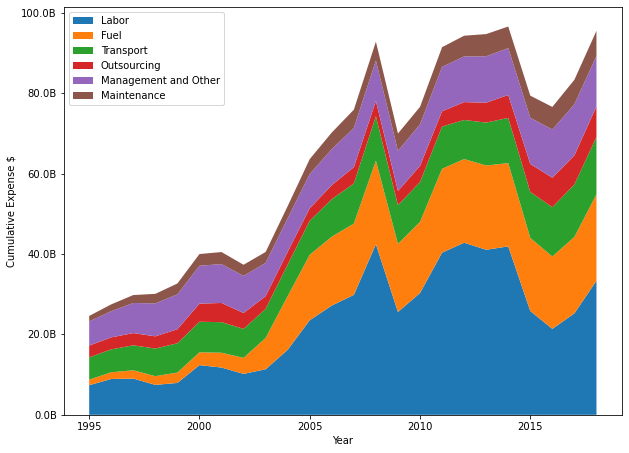

In [35]:
#stack plot of expenses table. 
labels=["Labor","Fuel", "Transport", "Outsourcing","Management and Other", "Maintenance", "Outsourced Maintenance"]

plt.figure(figsize=(10,7.5))
ax=plt.subplot(111)

ax.stackplot(Year, expenses["Total Fuel Expenses ($)"],expenses["Transport Related Expenses ($)"],
              expenses["Other Outsourcing Expenses ($)"],expenses["Management and Other Expenses ($)"],
             expenses["Flight Equipment Maintenance Expense ($)"], 
              expenses["Outsourced Flight Equipment Maintenance Expense ($)"], labels=labels)


ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel("Cumulative Expense $")
ax.set_xlabel("Year")

plt.legend(loc="upper left")
print(expenses["Total Fuel Expenses ($)"][2018])
print(expenses["Transport Related Expenses ($)"][2018])

All expenses follow the same shape with dips at 2001 and 2008 as total revenue and exepnse do shown earlier. in general the proportion of each expenses remains relatively consistent across the years.

(-1.159725195938864, 1.103156389203214, -1.1128622987654158, 1.206135312920789)

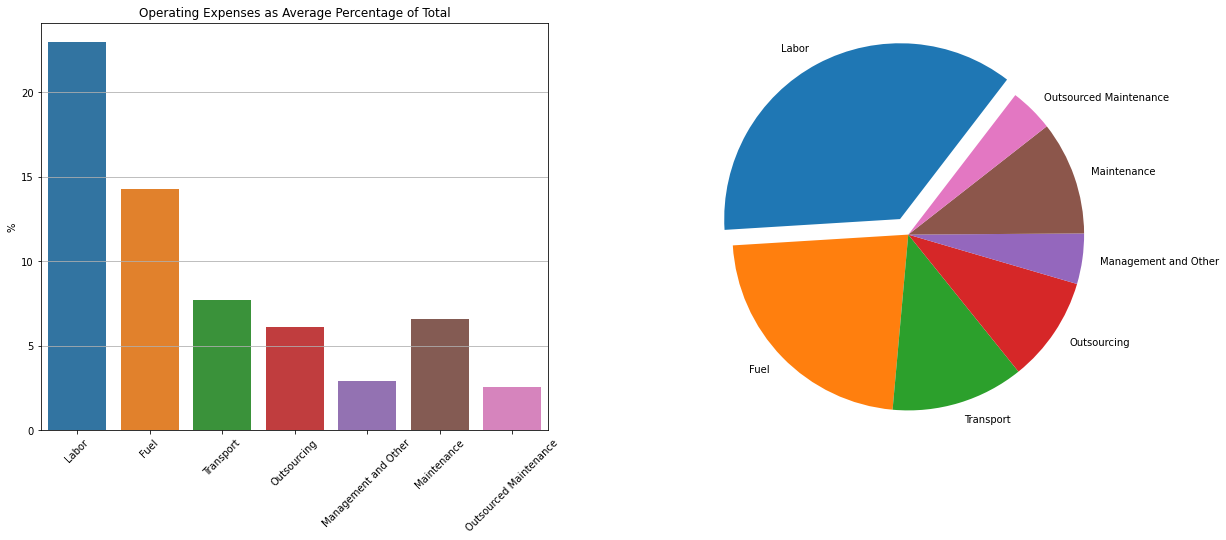

In [36]:
# take average percentage of total expenses and plot against each feature selected
plt.figure(figsize=(20,7.5))

ax1=plt.subplot(121)

total=expenses["Total Operating Expenses ($)"]

labor_perc=np.mean((expenses["Total Labour Operating Expenses ($)"]/total)*100)
fuel_perc= np.mean((expenses["Total Fuel Expenses ($)"]/total)*100)
trans_perc=np.mean((expenses["Transport Related Expenses ($)"]/total)*100)
outsource_perc= np.mean((expenses["Other Outsourcing Expenses ($)"]/total)*100)
mgmnt_perc= np.mean((expenses["Management and Other Expenses ($)"]/total)*100)
maint_perc= np.mean((expenses["Flight Equipment Maintenance Expense ($)"]/total)*100)
outs_maint_perc= np.mean((expenses["Outsourced Flight Equipment Maintenance Expense ($)"]/total)*100)

expense_percentages=[labor_perc,fuel_perc, trans_perc,outsource_perc,mgmnt_perc,maint_perc,outs_maint_perc]

ax1=sns.barplot(labels, expense_percentages)

plt.grid(axis='y')
plt.title("Operating Expenses as Average Percentage of Total")
plt.ylabel("%")
plt.xticks(rotation=45)

ax2=plt.subplot(122)

explode = (0.1, 0, 0, 0,0,0,0)  # explode 1st slice

plt.pie(expense_percentages,explode=explode, labels=labels, startangle=52.5)

plt.axis('equal')

### Breakdown of Labour expenses through Employee Compensation

In [37]:
#sankey diagram 1st layer connections 
print("All expenses fraction of revenue:")

print((df["Total Labour Operating Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Total Fuel Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Transport Related Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Other Outsourcing Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Management and Other Expenses ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Flight Equipment Maintenance Expense ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Outsourced Flight Equipment Maintenance Expense ($)"]).sum()/(df["Total Operating Revenue ($)"].sum()))
print((df["Total Profits"]).sum()/(df["Total Operating Revenue ($)"].sum()))


avg_emp_exp=np.mean(df["Total Labour Operating Expenses ($)"]/df["Full Time Employees Equivalents"])

# sankey 2nd layer - labour expenses to compensation

print("Compensation fraction of revenue:")
print((df["Non Cockpit Employees Avg Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["All Employees average benefits and pensions ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Pilot and Co-Pilot wages ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Flight Attendant Employee Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Ground Staff Employee Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Maintenance Staff Wage ($)"]/df["Total Operating Revenue ($)"]).sum())
print((df["Average Management and Others Wage ($)"]/df["Total Operating Revenue ($)"]).sum())


All expenses fraction of revenue:
0.21342525222233955
0.14657654986779392
0.08174145917688909
0.05848542118351285
0.02783913366573641
0.06196952027358395
0.02509547573764702
0.041718579260328716
Compensation fraction of revenue:
6.122752128262337e-06
2.637208409141488e-06
2.364866882147188e-05
6.671064619080196e-06
6.580704937256467e-06
1.0152527404755336e-05
1.173264519961953e-05


In [38]:
#Sankey diagram of all cash flow for total industry

import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Total System Revenue", "Labor Expenses","Fuel Expenses", "Transport Expenses", "OutSourcing Expenses", 
               "Management Expenses", "Flight Equipment Maintenance", "Flight Equipment OutSourcing Expenses", "Profits",
              "Non Cockput Employee Wage", "All Employee Benefits", "Pilot Wage", "Flight Attendant Wage",
               "Ground Staff Wage","Maintenance Wage", "Management/Other Wage"],
      color = ["dodgerblue", "red","blueviolet","gold","orchid","teal", "gray","orange","limegreen",
               "red","red","red","red","red","red","red",]
    ),
    link = dict(
      source = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
      value =  [210000, 150000, 80000, 60000, 30000, 60000, 30000, 40000, 6000, 3000, 30000, 7000,7000,10000,12000]
  ))])

fig.update_layout(title_text="Sankey Diagram of Cumulative Cash Flow in US Commercial Airline Industry", font_size=12.5)
fig.show()

Pearsons Correlation between No. employees and Total Profits is:  -0.2924976366430854
Pearsons Correlation between No. employees and Total system Revenue is:  -0.575877386261329
Pearsons Correlation between No. employees and Total system Expenses is:  0.5404828946370221


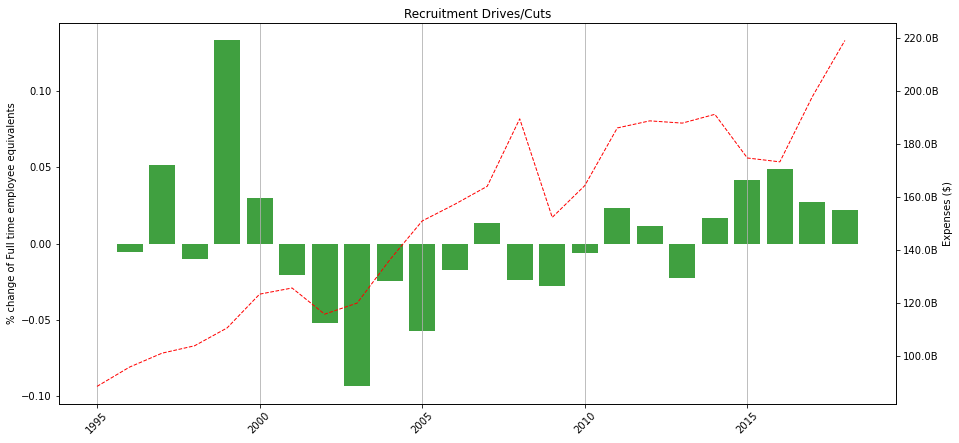

In [39]:
employee_change=compensation["Full Time Employees Equivalents"].pct_change()
Year=np.arange(1995,2019,1)

fig, ax = plt.subplots(figsize=(15,7))


ax.bar(Year,employee_change, alpha=0.75, color = 'g')
plt.title("Recruitment Drives/Cuts")
ax.set_ylabel("% change of Full time employee equivalents")
plt.xticks(rotation=45)


ax2 = ax.twinx()

ax2.plot(df["Total Operating Expenses ($)"], lw=1, ls='--', color='r')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Expenses ($)")
ax.grid(axis='x')

import scipy as sp
print("Pearsons Correlation between No. employees and Total Profits is: ", 
      sp.stats.pearsonr(compensation["Full Time Employees Equivalents"],
                        df["Total Profits"])[0])

print("Pearsons Correlation between No. employees and Total system Revenue is: ", 
      sp.stats.pearsonr(compensation["Full Time Employees Equivalents"],
                        df["Total Operating Revenue ($)"])[0])

print("Pearsons Correlation between No. employees and Total system Expenses is: ", 
      sp.stats.pearsonr(compensation["Full Time Employees Equivalents"],
                        -1*df["Total Operating Expenses ($)"])[0])




# Forecasting and Modelling
ARIMA Forescasting on major features

ARIMA on Revenue, Expenses, Profits, Flights per Day or passengers

- Model can be created using statsmodels library as follows:

1) Define model by calling ARIMA() and passing p, d, q parameters and using the Augmented Dickey-Fuller test to determine these values.

2) model is prepared on the training data by calling the fit() function

3) predictions can be made by calling the forecast() function and specifying the index of time period to be predicted

This process will be repeated for series being modelled.

It must be noted that we do not expect spectacular results since the data is presented on a year-by-year basis and there are only 24 data points to work with, rather this is a demonstration of how to implement and assess the components of ARIMA forecasting. 

In [40]:
# need to check if stationary first, two ways: rolling statistics and augmented dickey-fuller test (ADF). 
# we will be using dickey-fuller. series will be considered stationary if the p-value is low (according to null hypothesis)
# and the critical values at 1% 5% 10% confidence intervals are as close as possible to ADF stats.

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

<function pandas.plotting._misc.register()>

In [41]:
### Checking series for stationarity and determining a suitable d value (for the I parameter).

In [42]:
# a function to run the two tests which determine whether a given time series is stationary.

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

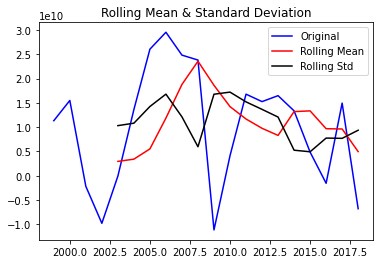

ADF Statistic: -2.5406273430542408
p-value: 0.1058995088319164
Critical Values:
	1%: -3.8326031418574136
	5%: -3.0312271701414204
	10%: -2.655519584487535


In [43]:
rev = df['Total Operating Revenue ($)'] 
rolling_mean = rev.rolling(window=5).mean()
rev_minus_mean = rev - rolling_mean
rev_minus_mean.dropna(inplace=True)    

get_stationarity(rev_minus_mean)

taking 1 difference of the mean from the revenue made the p value small and brought the value of the Augmented Dickey-Fuller stat close to the required thresholds. we can conclude that the series is stationary. When making our model we now know that a d value of 1 should make the series stationary. 

### Finding a starting point for the p value (AR parameter)

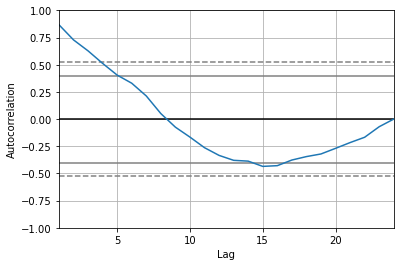

In [44]:
pd.plotting.autocorrelation_plot(rev)

significant positive correlation for for first 4 or 5 lags. 4 may be a good place to start AR parameter (p value) from.

To make a starting guess, a difference order of 1 for the I parameter (d value) will be used to achieve stationarity and a moving average model, the MA parameter (q vaule) of 0 will be used. 

(4,1,0) will be used as a baseline.

In [45]:
model=ARIMA(rev, order=(1,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())


                                   ARIMA Model Results                                   
Dep. Variable:     D.Total Operating Revenue ($)   No. Observations:                   23
Model:                            ARIMA(1, 1, 0)   Log Likelihood                -567.862
Method:                                  css-mle   S.D. of innovations    12760244204.872
Date:                           Tue, 30 Jan 2024   AIC                           1141.725
Time:                                   16:59:51   BIC                           1145.131
Sample:                                        1   HQIC                          1142.581
                                                                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                4.613e+09    2.2e+09      2.095    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



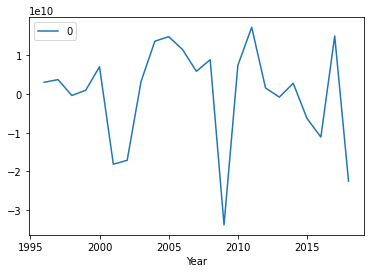

In [46]:
#plot residual errors

residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

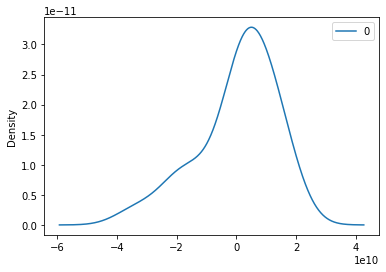

In [47]:
residuals.plot(kind='kde')

error denisty plot results show that the errors are gaussain and there is a bias in prediction (non-zero mean).


### Rolling forecast ARIMA model:

predicted=154358891984.229218, expected=174677395010.000061
predicted=177854801870.856506, expected=193040699220.000031
predicted=198379301435.842987, expected=196105250449.999908
predicted=202320896699.126465, expected=200244883860.000061
predicted=206262828323.474426, expected=207713887300.000061
predicted=213566088703.607483, expected=205360892950.000031
predicted=211560397321.907318, expected=200413561330.000031
predicted=205991829485.207764, expected=222127901510.000000
predicted=226282800481.883240, expected=200413561330.000031
Test MSE: 197356366391875272704.000
R squared:  -0.38428398805130737


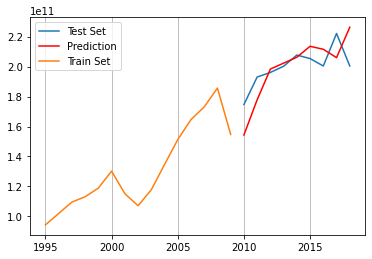

In [48]:
# using predict() on ARIMA results to make predictions
#train to test split will approx. be 2/3 to 1/3

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = rev.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train_years, test_years  = (1995 + np.arange(0,size)) , (1995 + np.arange(size,len(X)))
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r_sq=r2_score(test, predictions)
print('R squared: ', r_sq)

# plot
#
plt.plot(test_years, test, label="Test Set")
plt.plot(test_years, predictions, color='red', label="Prediction")
plt.plot(train_years, train, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=208303831561.198669
predicted=217301009546.098999
predicted=220649494500.133484
predicted=225094090842.815430
predicted=230322123905.485474
predicted=235166403923.825195
predicted=239955145503.335480
predicted=244828076880.216278
predicted=249691617655.032745
predicted=254541643638.850952
34
24


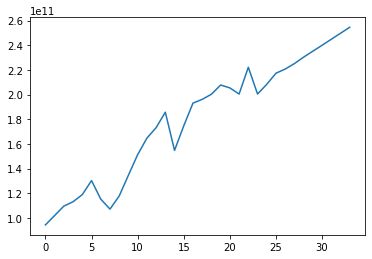

In [49]:
X = rev.values
size = int(len(X))
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
    
plt.plot(history)
print(len(history))
print(len(X))

[ 5.55409392e+09 -1.09871107e+13]


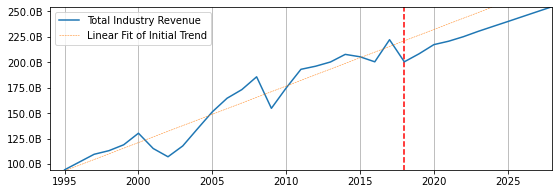

In [50]:
plt.figure(figsize=(9,3))

ax1=plt.subplot(111)

px = np.arange(1995,2029)

ax1.plot(px,history, label="Total Industry Revenue")
ax1.vlines(x=2018, ymin=0, ymax=(300*10**11), ls='dashed', color='r')
ax1.set_ylim(min(history), max(history))

c = np.polyfit(Year, rev, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")
ax1.set_xlim(1994,2028)
ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

### ARIMA for No. of Passengers Enplaned

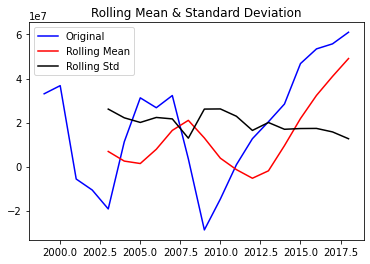

ADF Statistic: -1.8457775936472243
p-value: 0.35798269437321706
Critical Values:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603


In [51]:
passengers=df["Total Enplaned Passengers"]
rolling_mean = passengers.rolling(window=5).mean()
passengers_minus_mean = passengers - rolling_mean
passengers_minus_mean.dropna(inplace=True)    

get_stationarity(passengers_minus_mean)

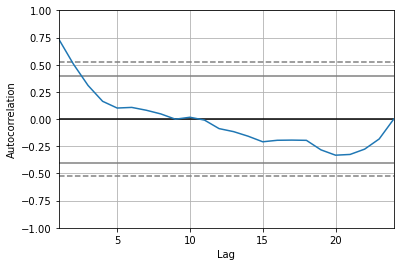

In [52]:
pd.plotting.autocorrelation_plot(passengers)

In [53]:
model1=ARIMA(passengers, order=(1,1,0))
model_fit1=model1.fit(disp=0)
print(model_fit1.summary())

                                  ARIMA Model Results                                  
Dep. Variable:     D.Total Enplaned Passengers   No. Observations:                   23
Model:                          ARIMA(1, 1, 0)   Log Likelihood                -417.310
Method:                                css-mle   S.D. of innovations       18309713.905
Date:                         Tue, 30 Jan 2024   AIC                            840.620
Time:                                 16:59:57   BIC                            844.027
Sample:                                      1   HQIC                           841.477
                                                                                       
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.122e+07   5.36e+06      2.093      0.036    7.14e+05   

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



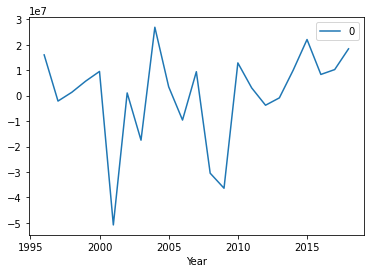

In [54]:
#plot residual errors

residuals1=pd.DataFrame(model_fit1.resid)
residuals1.plot()

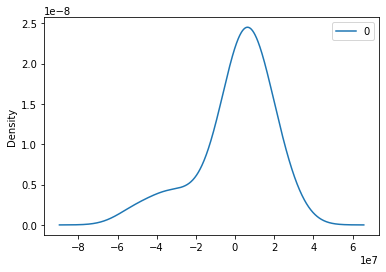

In [55]:
residuals1.plot(kind='kde')

Evidence of a slight positive bias

predicted=540607901.096028, expected=552919514.000000
predicted=558899715.527923, expected=567022189.000000
predicted=573895170.399992, expected=575338160.000000
predicted=581720263.567575, expected=584814665.000000
predicted=591494561.509905, expected=605529024.000000
predicted=614253360.533053, expected=641648148.000000
predicted=655118928.661789, expected=668648686.000000
predicted=682117344.488029, expected=694836039.000000
predicted=709177775.715478, expected=728935700.000000
Test MSE: 212427060034471.750
R squared:  0.9380804323220742


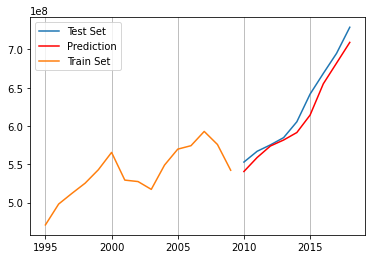

In [56]:
# using predict() on ARIMA results to make predictions
#train to test split will approx. be 2/3 to 1/3

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X1 = passengers.values
size1 = int(len(X1) * 0.66)
train1, test1 = X1[0:size1], X1[size1:len(X1)]
train_years1, test_years1  = (1995 + np.arange(0,size1)) , (1995 + np.arange(size1,len(X1)))
history1 = [x for x in train1]
predictions1 = list()
for t in range(len(test1)):
    model1 = ARIMA(history1, order=(1,1,0))
    model_fit1 = model1.fit(disp=0)
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    predictions1.append(yhat1)
    obs1 = test1[t]
    history1.append(obs1)
    print('predicted=%f, expected=%f' % (yhat1, obs1))

error1 = mean_squared_error(test1, predictions1)
print('Test MSE: %.3f' % error1)


r_sq1=r2_score(test1, predictions1)
print('R squared: ', r_sq1)

# plot
#
plt.plot(test_years1, test1, label="Test Set")
plt.plot(test_years1, predictions1, color='red', label="Prediction")
plt.plot(train_years1, train1, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=747016987.652118
predicted=760549786.470335
predicted=772737600.748213
predicted=784526283.787849
predicted=796196140.185664
predicted=807830522.184591
predicted=819454286.892760
predicted=831074866.470082
predicted=842694488.428659
predicted=854313821.882844
34
24


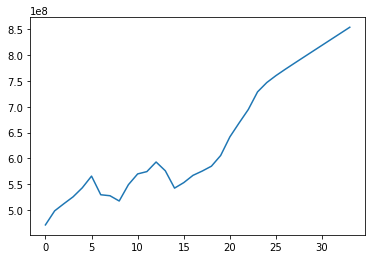

In [57]:
X1 = passengers.values
size1 = int(len(X1))
history1 = [x for x in X1]
predictions1 = list()
for t in range(10):
    model1 = ARIMA(history1, order=(2,1,0))
    model_fit1 = model1.fit(disp=0)
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    history1.append(yhat1)
    print('predicted=%f' % (yhat1))
    
plt.plot(history1)
print(len(history1))
print(len(X1))

[ 7.53180499e+06 -1.45412014e+10]


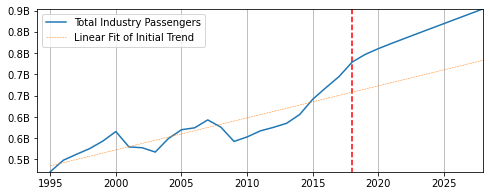

In [58]:
plt.figure(figsize=(8,3))

ax1=plt.subplot(111)
px = np.arange(1995,2029)
ax1.plot(px,history1, label="Total Industry Passengers")
ax1.vlines(x=2018, ymin=0, ymax=(300*10**11), ls='dashed', color='r')
ax1.set_ylim(min(history1), max(history1))

c = np.polyfit(Year, passengers, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")
ax1.set_xlim(1994,2028)
ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

### ARIMA for expenses

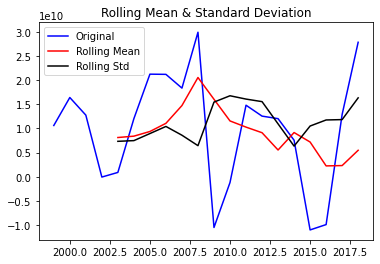

ADF Statistic: -3.4869003235371094
p-value: 0.008329964321485852
Critical Values:
	1%: -3.859073285322359
	5%: -3.0420456927297668
	10%: -2.6609064197530863


In [59]:
exp=df["Total Operating Expenses ($)"]
rolling_mean = exp.rolling(window=5).mean()
exp_minus_mean = exp - rolling_mean
exp_minus_mean.dropna(inplace=True)    

get_stationarity(exp_minus_mean)

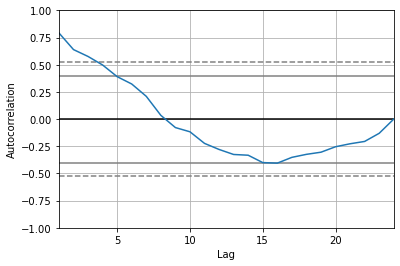

In [60]:
pd.plotting.autocorrelation_plot(exp)

Starting p value of 2 seems reasonable

In [61]:
model2=ARIMA(exp, order=(2,1,0))
model_fit2=model2.fit(disp=0)
print(model_fit2.summary())

                                   ARIMA Model Results                                    
Dep. Variable:     D.Total Operating Expenses ($)   No. Observations:                   23
Model:                             ARIMA(2, 1, 0)   Log Likelihood                -567.383
Method:                                   css-mle   S.D. of innovations    12418874382.610
Date:                            Tue, 30 Jan 2024   AIC                           1142.767
Time:                                    17:00:04   BIC                           1147.309
Sample:                                         1   HQIC                          1143.909
                                                                                          
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 5.671e+09   1.73e+09    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



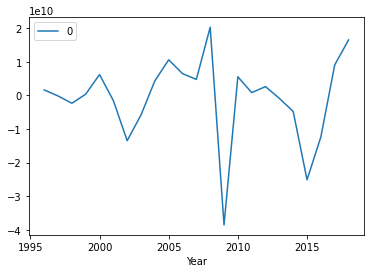

In [62]:
#plot residual errors

residuals2=pd.DataFrame(model_fit2.resid)
residuals2.plot()

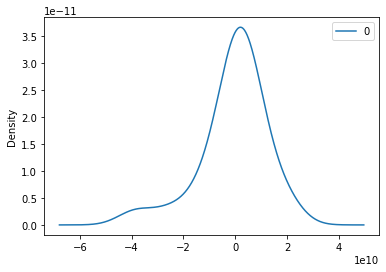

In [63]:
residuals2.plot(kind='kde')

predicted=173833733600.435425, expected=164152976630.000000
predicted=182484141587.132996, expected=185895476149.999939
predicted=182706416056.138367, expected=188574523300.000031
predicted=189299524827.296753, expected=187725860459.999939
predicted=196979446169.222351, expected=191035957879.999969
predicted=199794569550.712891, expected=174572436249.999939
predicted=186467252737.016418, expected=173121583029.999939
predicted=185101699651.787994, expected=197726952170.000000
predicted=199384407842.178284, expected=218881654370.000000
Test MSE: 170154771745990541312.000
R squared:  0.24221186471125333


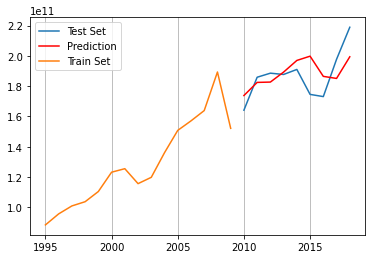

In [64]:
# using predict() on ARIMA results to make predictions
#train to test split will approx. be 2/3 to 1/3

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X2 = exp.values
size2 = int(len(X2) * 0.66)
train2, test2 = X2[0:size2], X2[size2:len(X2)]
train_years2, test_years2  = (1995 + np.arange(0,size2)) , (1995 + np.arange(size2,len(X2)))
history2 = [x for x in train2]
predictions2 = list()
for t in range(len(test2)):
    model2 = ARIMA(history2, order=(2,1,0))
    model_fit2 = model2.fit(disp=0)
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    predictions2.append(yhat2)
    obs2 = test2[t]
    history2.append(obs2)
    print('predicted=%f, expected=%f' % (yhat2, obs2))

error2 = mean_squared_error(test2, predictions2)
print('Test MSE: %.3f' % error2)


r_sq2=r2_score(test2, predictions2)
print('R squared: ', r_sq2)

# plot
#
plt.plot(test_years2, test2, label="Test Set")
plt.plot(test_years2, predictions2, color='red', label="Prediction")
plt.plot(train_years2, train2, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

High, positive R squared shows that ARIMA model is a very good fit and that 94% of the variance is explained

predicted=214222985975.805023
predicted=215221854354.586670
predicted=224890249156.662323
predicted=230924954659.427216
predicted=234330761451.178375
predicted=239574110782.713623
predicted=245489472024.754761
predicted=250585264054.475830
predicted=255571073476.069946
predicted=260890679285.436432
34
24


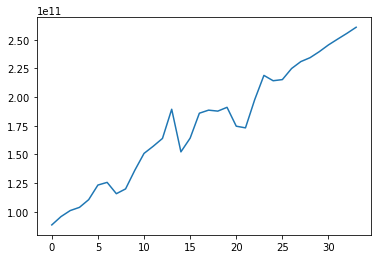

In [65]:
X2 = exp.values
size2 = int(len(X2))
history2 = [x for x in X2]
predictions2 = list()
for t in range(10):
    model2 = ARIMA(history2, order=(2,1,0))
    model_fit2 = model2.fit(disp=0)
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    history2.append(yhat2)
    print('predicted=%f' % (yhat2))
    
plt.plot(history2)
print(len(history2))
print(len(X2))

In [66]:
prediction_years=np.arange(1995, 2029)
len(prediction_years)

34

[ 5.04375568e+09 -9.96967433e+12]


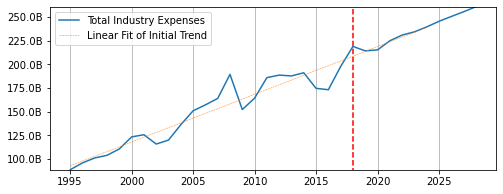

In [67]:
plt.figure(figsize=(8,3))

ax1=plt.subplot(111)

#ax1.plot(test_years2, test2, label="Test Set")
ax1.plot(prediction_years,history2, label="Total Industry Expenses")
ax1.vlines(x=2018, ymin=0, ymax=(300*10**11), ls='dashed', color='r')
ax1.set_ylim(min(history2), max(history2))

c = np.polyfit(Year, exp, 1)
print(c)
p = np.poly1d(c)
px = np.arange(1995,2025)
py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

### ARIMA for Profits

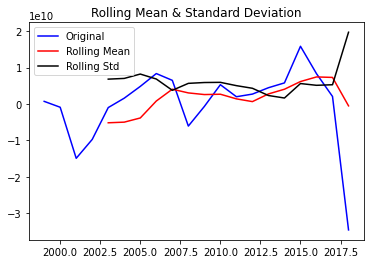

ADF Statistic: -2.5380340925284295
p-value: 0.10649228644273889
Critical Values:
	1%: -3.889265672705068
	5%: -3.0543579727254224
	10%: -2.66698384083045


In [68]:
prof=df["Total Profits"]
rolling_mean = prof.rolling(window=5).mean()
prof_minus_mean = prof - rolling_mean
prof_minus_mean.dropna(inplace=True)    

get_stationarity(prof_minus_mean)

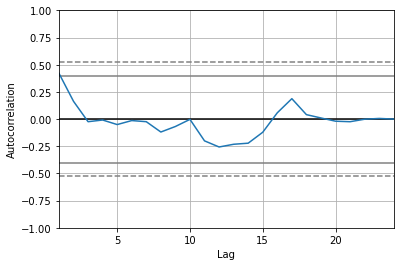

In [69]:
pd.plotting.autocorrelation_plot(prof)

In [70]:
model3=ARIMA(exp, order=(1,1,0))
model_fit3=model3.fit(disp=0)
print(model_fit3.summary())

                                   ARIMA Model Results                                    
Dep. Variable:     D.Total Operating Expenses ($)   No. Observations:                   23
Model:                             ARIMA(1, 1, 0)   Log Likelihood                -569.081
Method:                                   css-mle   S.D. of innovations    13465694608.777
Date:                            Tue, 30 Jan 2024   AIC                           1144.162
Time:                                    17:00:11   BIC                           1147.569
Sample:                                         1   HQIC                          1145.019
                                                                                          
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 5.671e+09   2.53e+09    

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



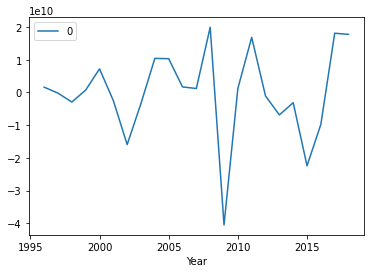

In [71]:
#plot residual errors

residuals3=pd.DataFrame(model_fit3.resid)
residuals3.plot()

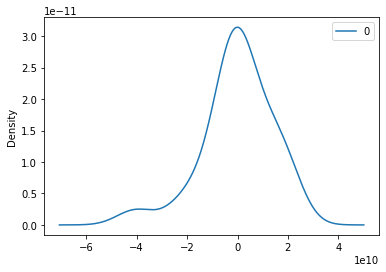

In [72]:
residuals3.plot(kind='kde')

predicted=5731541768.299714, expected=10524418380.000061
predicted=8093864788.844278, expected=7145223070.000092
predicted=4206296081.058061, expected=7530727149.999878
predicted=8925775186.058857, expected=12519023400.000122
predicted=12516896515.208614, expected=16677929420.000092
predicted=15335608179.764769, expected=30788456700.000092
predicted=31568228197.213177, expected=27291978300.000092
predicted=24428643991.077122, expected=24400949340.000000
predicted=26689128808.475620, expected=-18468093039.999969
Test MSE: 262377927717611536384.000
R squared:  -0.3691111564015892


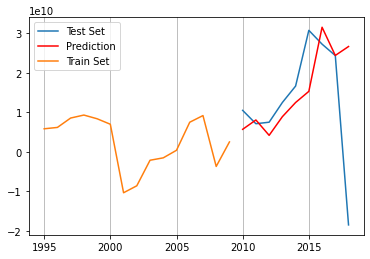

In [73]:
# using predict() on ARIMA results to make predictions
#train to test split will approx. be 2/3 to 1/3

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X3 = prof.values
size3 = int(len(X3) * 0.66)
train3, test3 = X3[0:size3], X3[size3:len(X3)]
train_years3, test_years3  = (1995 + np.arange(0,size3)) , (1995 + np.arange(size3,len(X3)))
history3 = [x for x in train3]
predictions3 = list()
for t in range(len(test3)):
    model3 = ARIMA(history3, order=(2,1,0))
    model_fit3 = model3.fit(disp=0)
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    predictions3.append(yhat3)
    obs3 = test3[t]
    history3.append(obs3)
    print('predicted=%f, expected=%f' % (yhat3, obs3))

error3 = mean_squared_error(test3, predictions3)
print('Test MSE: %.3f' % error3)


r_sq3=r2_score(test3, predictions3)
print('R squared: ', r_sq3)

# plot
#
plt.plot(test_years3, test3, label="Test Set")
plt.plot(test_years3, predictions3, color='red', label="Prediction")
plt.plot(train_years3, train3, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=-24919845836.802361
predicted=-22973105892.818130
predicted=-23211145389.123226
predicted=-24501927907.673172
predicted=-25733073770.813896
predicted=-26859843406.551254
predicted=-27978203802.667118
predicted=-29105076002.917999
predicted=-30233863057.138206
predicted=-31362115504.833858
34
24


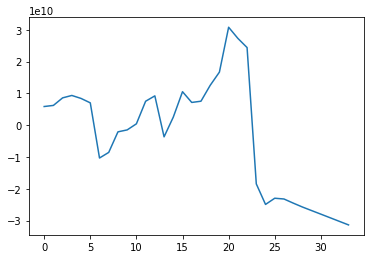

In [74]:
X3 = prof.values
size3 = int(len(X3))
history3 = [x for x in X3]
predictions3 = list()
for t in range(10):
    model3 = ARIMA(history3, order=(2,1,0))
    model_fit3 = model3.fit(disp=0)
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    history3.append(yhat3)
    print('predicted=%f' % (yhat3))
    
plt.plot(history3)
print(len(history3))
print(len(X3))

[ 5.10338244e+08 -1.01743641e+12]


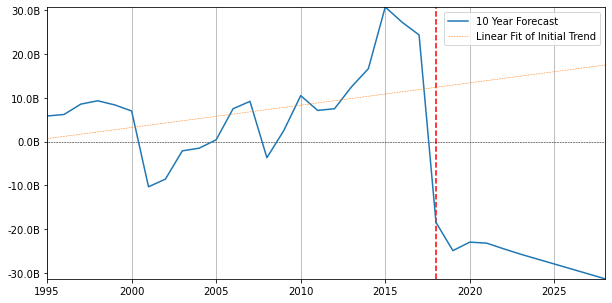

In [75]:
plt.figure(figsize=(10,5))

ax1=plt.subplot(111)
px = np.arange(1995,2029)
#ax1.plot(test_years2, test2, label="Test3Set")
ax1.plot(px,history3, label="10 Year Forecast")
ax1.vlines(x=2018, ymin=min(history3), ymax=(300*10**11), ls='dashed', color='r')
ax1.hlines(y=0, xmin=1990, xmax=2030, ls='dashed', lw=0.5)
ax1.set_ylim(min(history3), max(history3))
ax1.set_xlim(min(prediction_years), max(prediction_years))

c = np.polyfit(Year, prof, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

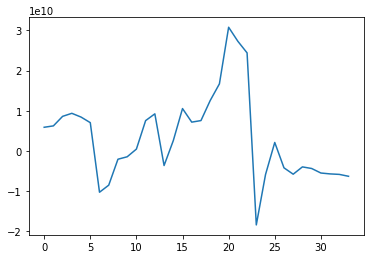

In [76]:
prof_alternate=np.array(history)-np.array(history2)
plt.plot(prof_alternate)

[ 5.10338244e+08 -1.01743641e+12]


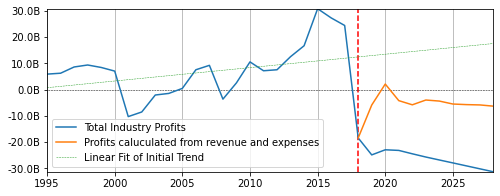

In [77]:
plt.figure(figsize=(8,3))

ax1=plt.subplot(111)

#ax1.plot(test_years2, test2, label="Test3Set")
ax1.plot(prediction_years,history3, label="Total Industry Profits")
plt.plot(prediction_years[23:], prof_alternate[23:], label='Profits caluculated from revenue and expenses')
ax1.vlines(x=2018, ymin=min(history3), ymax=(300*10**11), ls='dashed', color='r')
ax1.hlines(y=0, xmin=1990, xmax=2030, ls='dashed', lw=0.5)
ax1.set_ylim(min(history3), max(history3))
ax1.set_xlim(min(prediction_years), max(prediction_years))

c = np.polyfit(Year, prof, 1)
print(c)
p = np.poly1d(c)
px = np.arange(1995,2030)
py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()